# Lecture 17

## Pandas, Numpy, and Matplotlib 

If you need a numpy refresher, please walk-through this [Numpy Lecture](Numpy.ipynb).

`matplotlib` is the most commonly used plotting tool in the python ecosystem. There is extensive documentation, and you are encouraged to look through the [Tutorials](https://matplotlib.org/3.3.3/tutorials/index.html).


## Basic Data Manipulation / Visualization

Our standard tools are pandas, numpy, and matplotlib... let's get them setup:

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Workplace Fatalities by State Data

Lets look at some workforce data... unfortunately the source site is no longer avaliable.

In [108]:
!ls -lh

total 13208
-rw-r--r--@ 1 afarbin  staff   4.8K Mar 28 11:11 2012_Workplace_Fatalities_by_State.csv
-rw-r--r--@ 1 afarbin  staff   3.6M Mar 28 12:55 Lecture.17.ipynb
-rw-r--r--@ 1 afarbin  staff    54K Mar 28 13:04 Numpy.ipynb
-rw-r--r--@ 1 afarbin  staff    11K Mar 28 11:04 heart.csv
-rw-r--r--@ 1 afarbin  staff   2.7M Mar 28 12:29 stockholm_td_adj.dat


In [109]:
!head 2012_Workplace_Fatalities_by_State.csv 

State,"Number of Fatalities, 2012","Rate of Fatalities, 2012","State Rank, Fatalities 2012",Number of Injuries/Illnesses 2012,Injuries/Illnesses 2012 Rate,Penalties FY 2013 (Average $),Penalties FY 2013 (Rank),Inspectors,Years to Inspect Each Workplace Once,State or Federal Program
"South Carolina
(33.99882060100049, -81.04536765699964)",63,3.5,25,36200,3,492,49,24,111,State
"West Virginia
(38.665511497000466, -80.71263935099967)",49,6.9,46,19800,4.1,1798,27,7,173,Federal
"Massachusetts
(42.27687306500047, -72.08268985899963)",44,1.4,1,69700,3.1,1929,21,33,123,Federal
"Tennessee
(35.680943063000484, -85.77448642199965)",101,3.8,30,65100,3.5,727,45,30,82,State
"Oklahoma


We can read the data with Pandas as we have done before:

In [110]:
df=pd.read_csv("2012_Workplace_Fatalities_by_State.csv")

In [111]:
df.head()

State  \
0  South Carolina\n(33.99882060100049, -81.045367...   
1  West Virginia\n(38.665511497000466, -80.712639...   
2  Massachusetts\n(42.27687306500047, -72.0826898...   
3  Tennessee\n(35.680943063000484, -85.7744864219...   
4  Oklahoma\n(35.472034350000456, -97.52106845499...   

   Number of Fatalities, 2012  Rate of Fatalities, 2012  \
0                        63.0                       3.5   
1                        49.0                       6.9   
2                        44.0                       1.4   
3                       101.0                       3.8   
4                        97.0                       6.1   

   State Rank, Fatalities 2012  Number of Injuries/Illnesses 2012  \
0                         25.0                            36200.0   
1                         46.0                            19800.0   
2                          1.0                            69700.0   
3                         30.0                            65100.0   
4                         42.0                            39000.0   

   Injuries/Illnesses 2012 Rate  Penalties FY 2013 (Average $)  \
0                           3.0                          492.0   
1                           4.1                         1798.0   
2                           3.1                         1929.0   
3                           3.5                          727.0   
4                           3.6                         1872.0   

   Penalties FY 2013 (Rank)  Inspectors  Years to Inspect Each Workplace Once  \
0                      49.0        24.0                                 111.0   
1                      27.0         7.0                                 173.0   
2                      21.0        33.0                                 123.0   
3                      45.0        30.0                                  82.0   
4                      24.0        19.0                                 131.0   

  State or Federal Program  
0                    State  
1                  Federal  
2                  Federal  
3                    State  
4                  Federal

In [112]:
df.tail()

State  \
49  California\n(37.638640488000476, -120.99999889...   
50                                                NaN   
51                                                NaN   
52                                                NaN   
53                         Total or National, Average   

    Number of Fatalities, 2012  Rate of Fatalities, 2012  \
49                       375.0                       2.3   
50                         NaN                       NaN   
51                         NaN                       NaN   
52                         NaN                       NaN   
53                      4628.0                       3.4   

    State Rank, Fatalities 2012  Number of Injuries/Illnesses 2012  \
49                          6.0                           345400.0   
50                          NaN                                NaN   
51                          NaN                                NaN   
52                          NaN                                NaN   
53                          NaN                                NaN   

    Injuries/Illnesses 2012 Rate  Penalties FY 2013 (Average $)  \
49                           3.5                         6422.0   
50                           NaN                            NaN   
51                           NaN                            NaN   
52                           NaN                            NaN   
53                           3.4                            NaN   

    Penalties FY 2013 (Rank)  Inspectors  \
49                       1.0       216.0   
50                       NaN         NaN   
51                       NaN         NaN   
52                       NaN         NaN   
53                       NaN         NaN   

    Years to Inspect Each Workplace Once State or Federal Program  
49                                 179.0                    State  
50                                   NaN                      NaN  
51                                   NaN                      NaN  
52                                   NaN                      NaN  
53                                   NaN                      NaN

There were some empty lines in the original CVS file, lets get rid of them:

In [113]:
df=df[list(map(lambda x: type(x)==str,df["State"]))]

In [114]:
df.tail()

State  \
46  New Jersey\n(40.1305700530005, -74.27368565099...   
47  North Dakota\n(47.47531738700047, -100.1184259...   
48     Texas\n(31.827243635000457, -99.4267664729997)   
49  California\n(37.638640488000476, -120.99999889...   
53                         Total or National, Average   

    Number of Fatalities, 2012  Rate of Fatalities, 2012  \
46                        92.0                       2.4   
47                        65.0                      17.7   
48                       536.0                       4.8   
49                       375.0                       2.3   
53                      4628.0                       3.4   

    State Rank, Fatalities 2012  Number of Injuries/Illnesses 2012  \
46                          8.0                            80900.0   
47                         50.0                                NaN   
48                         35.0                           203200.0   
49                          6.0                           345400.0   
53                          NaN                                NaN   

    Injuries/Illnesses 2012 Rate  Penalties FY 2013 (Average $)  \
46                           3.1                         2151.0   
47                           NaN                         3045.0   
48                           2.7                         2187.0   
49                           3.5                         6422.0   
53                           3.4                            NaN   

    Penalties FY 2013 (Rank)  Inspectors  \
46                      12.0        67.0   
47                       3.0         8.0   
48                      10.0        98.0   
49                       1.0       216.0   
53                       NaN         NaN   

    Years to Inspect Each Workplace Once State or Federal Program  
46                                 123.0                  Federal  
47                                 111.0                  Federal  
48                                 136.0                  Federal  
49                                 179.0                    State  
53                                   NaN                      NaN

Lets recall some basic Pandas manipulation:

In [115]:
df.columns[1]

'Number of Fatalities, 2012'

In [116]:
# To access a column
df[df.columns[1]][:50]

0      63.0
1      49.0
2      44.0
3     101.0
4      97.0
5     146.0
6      48.0
7      14.0
8      20.0
9      97.0
10     60.0
11    218.0
12    149.0
13     88.0
14    137.0
15    115.0
16    146.0
17     14.0
18     39.0
19    194.0
20     31.0
21    202.0
22     39.0
23     19.0
24     34.0
25     11.0
26     63.0
27     42.0
28     91.0
29     72.0
30     84.0
31     36.0
32     43.0
33     82.0
34    161.0
35     35.0
36     70.0
37     76.0
38     19.0
39     67.0
40    114.0
41     63.0
42    116.0
43    101.0
44      8.0
45     31.0
46     92.0
47     65.0
48    536.0
49    375.0
Name: Number of Fatalities, 2012, dtype: float64

Lets find the state with the max number of fatalities:

In [117]:
# Max of a column
# Note that the last rows is not a state, but the average
np.max(df[df.columns[1]][0:50])

536.0

In [118]:
# What was the index of the max?
np.argmax(df[df.columns[1]][0:50])

48

In [119]:
# What was the state?
df[df.columns[0]][np.argmax(df[df.columns[1]][0:50])]

'Texas\n(31.827243635000457, -99.4267664729997)'

The state names aren't quite right... lets look:

In [121]:
# State names:
df[df.columns[0]][0:50]

0     South Carolina\n(33.99882060100049, -81.045367...
1     West Virginia\n(38.665511497000466, -80.712639...
2     Massachusetts\n(42.27687306500047, -72.0826898...
3     Tennessee\n(35.680943063000484, -85.7744864219...
4     Oklahoma\n(35.472034350000456, -97.52106845499...
5     Illinois\n(40.48501278700047, -88.99770813999965)
6     Nebraska\n(41.64104043900045, -99.36571864599966)
7     Delaware\n(39.00883351400046, -75.57773943699965)
8      Hawaii\n(21.30485166200043, -157.85774691599974)
9        Iowa\n(42.469404401000475, -93.81648936699969)
10    Arizona\n(34.865973091000455, -111.76380949799...
11    Florida\n(28.932042899000464, -81.92895558499964)
12    Virginia\n(37.54268075100049, -78.45788924199968)
13    Missouri\n(38.63579372300046, -92.56629737199967)
14    Michigan\n(44.66131575600048, -84.71438724399968)
15     Indiana\n(39.76691364600049, -86.14995579899966)
16    North Carolina\n(35.46622388600048, -79.159249...
17    New Hampshire\n(43.6559537330005, -71.5003

In [76]:
# Clean it up
state_names=list(map(lambda x: x.split("\n")[0],df[df.columns[0]][0:50]))
state_names

['South Carolina',
 'West Virginia',
 'Massachusetts',
 'Tennessee',
 'Oklahoma',
 'Illinois',
 'Nebraska',
 'Delaware',
 'Hawaii',
 'Iowa',
 'Arizona',
 'Florida',
 'Virginia',
 'Missouri',
 'Michigan',
 'Indiana',
 'North Carolina',
 'New Hampshire',
 'New Mexico',
 'Pennsylvania',
 'South Dakota',
 'New York',
 'Utah',
 'Maine',
 'Montana',
 'Vermont',
 'Arkansas',
 'Nevada',
 'Kentucky',
 'Maryland',
 'Alabama',
 'Connecticut',
 'Oregon',
 'Colorado',
 'Ohio',
 'Wyoming',
 'Minnesota',
 'Kansas',
 'Idaho',
 'Washington',
 'Wisconsin',
 'Mississippi',
 'Louisiana',
 'Georgia',
 'Rhode Island',
 'Alaska',
 'New Jersey',
 'North Dakota',
 'Texas',
 'California']

In [122]:
longitude=list(map(lambda x: float(x.split("\n")[1].split(",")[0][1:]),df[df.columns[0]][0:50]))
latitude=list(map(lambda x: float(x.split("\n")[1].split(",")[1][:-1]),df[df.columns[0]][0:50]))

coordinates=list(zip(longitude,latitude))
coordinates

[(33.99882060100049, -81.04536765699964),
 (38.665511497000466, -80.71263935099967),
 (42.27687306500047, -72.08268985899963),
 (35.680943063000484, -85.77448642199965),
 (35.472034350000456, -97.52106845499969),
 (40.48501278700047, -88.99770813999965),
 (41.64104043900045, -99.36571864599966),
 (39.00883351400046, -75.57773943699965),
 (21.30485166200043, -157.85774691599974),
 (42.469404401000475, -93.81648936699969),
 (34.865973091000455, -111.76380949799972),
 (28.932042899000464, -81.92895558499964),
 (37.54268075100049, -78.45788924199968),
 (38.63579372300046, -92.56629737199967),
 (44.66131575600048, -84.71438724399968),
 (39.76691364600049, -86.14995579899966),
 (35.46622388600048, -79.15924924699965),
 (43.6559537330005, -71.50035726399966),
 (34.52088247800049, -106.24057768899968),
 (40.79373106100047, -77.86069775999965),
 (44.35313342000046, -100.37352811899967),
 (42.82700023900048, -75.54396639699968),
 (39.36070374600047, -111.5871285339997),
 (45.254228663000504, -68

In [78]:
df.shape

(51, 11)

In [123]:
df["State"]= state_names+["Total/Average"]
df["Longitude"]=longitude+[0.]
df["Latitude"]=latitude+[0.]

In [124]:
df

State  Number of Fatalities, 2012  Rate of Fatalities, 2012  \
0   South Carolina                        63.0                       3.5   
1    West Virginia                        49.0                       6.9   
2    Massachusetts                        44.0                       1.4   
3        Tennessee                       101.0                       3.8   
4         Oklahoma                        97.0                       6.1   
5         Illinois                       146.0                       2.5   
6         Nebraska                        48.0                       5.2   
7         Delaware                        14.0                       3.1   
8           Hawaii                        20.0                       3.4   
9             Iowa                        97.0                       6.6   
10         Arizona                        60.0                       2.3   
11         Florida                       218.0                       2.7   
12        Virginia                       149.0                       3.8   
13        Missouri                        88.0                       3.3   
14        Michigan                       137.0                       3.4   
15         Indiana                       115.0                       4.2   
16  North Carolina                       146.0                       3.5   
17   New Hampshire                        14.0                       2.2   
18      New Mexico                        39.0                       4.8   
19    Pennsylvania                       194.0                       3.4   
20    South Dakota                        31.0                       6.7   
21        New York                       202.0                       2.4   
22            Utah                        39.0                       3.0   
23           Maine                        19.0                       3.2   
24         Montana                        34.0                       7.3   
25         Vermont                        11.0                       3.5   
26        Arkansas                        63.0                       5.4   
27          Nevada                        42.0                       3.6   
28        Kentucky                        91.0                       4.9   
29        Maryland                        72.0                       2.6   
30         Alabama                        84.0                       4.3   
31     Connecticut                        36.0                       2.1   
32          Oregon                        43.0                       2.6   
33        Colorado                        82.0                       3.5   
34            Ohio                       161.0                       3.1   
35         Wyoming                        35.0                      12.2   
36       Minnesota                        70.0                       2.6   
37          Kansas                        76.0                       5.7   
38           Idaho                        19.0                       2.7   
39      Washington                        67.0                       2.2   
40       Wisconsin                       114.0                       4.0   
41     Mississippi                        63.0                       5.5   
42       Louisiana                       116.0                       6.4   
43         Georgia                       101.0                       2.5   
44    Rhode Island                         8.0                       1.7   
45          Alaska                        31.0                       8.9   
46      New Jersey                        92.0                       2.4   
47    North Dakota                        65.0                      17.7   
48           Texas                       536.0                       4.8   
49      California                       375.0                       2.3   
53   Total/Average                      4628.0                       3.4   

    State Rank, Fatalities 2012  Number of Injuries/Illnesse

Now lets make some basic bar graphs:

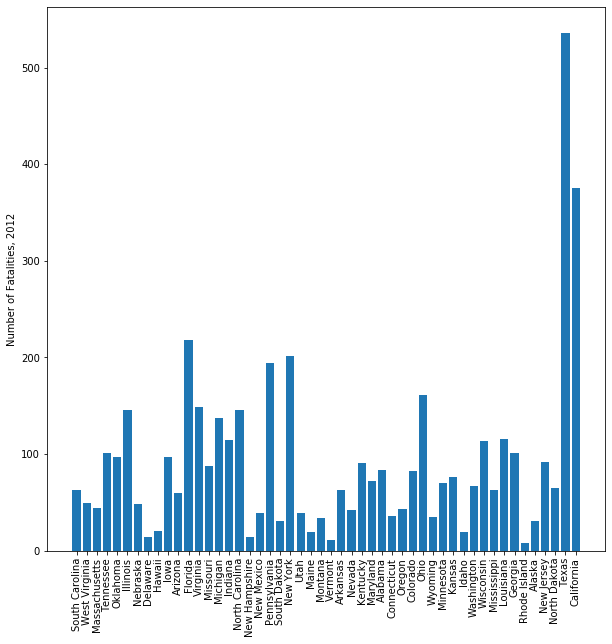

In [125]:
fig,ax= plt.subplots(1,1,figsize=(10,10))

ax.bar(range(50),df[df.columns[1]][0:50])
ax.set_xticks(range(50))
_=ax.set_xticklabels(state_names, rotation='vertical', fontsize=10)
_=ax.set_ylabel(df.columns[1])

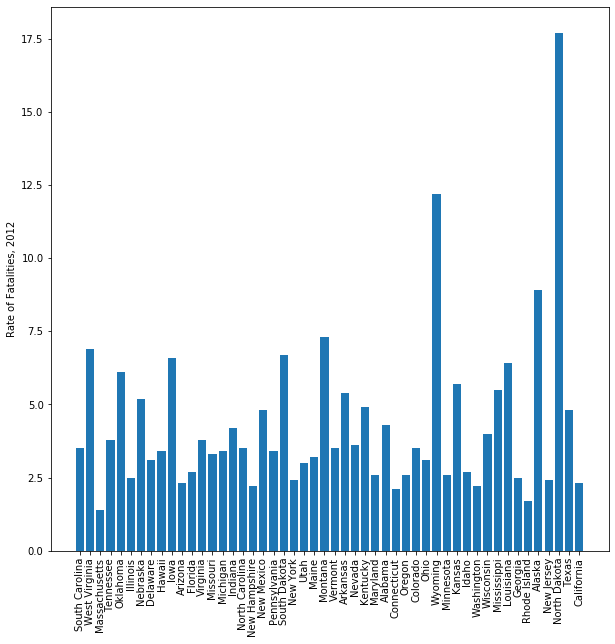

In [126]:
fig,ax= plt.subplots(1,1,figsize=(10,10))

ax.bar(range(50),df[df.columns[2]][0:50])
ax.set_xticks(range(50))
_=ax.set_xticklabels(state_names, rotation='vertical', fontsize=10)
_=ax.set_ylabel(df.columns[2])

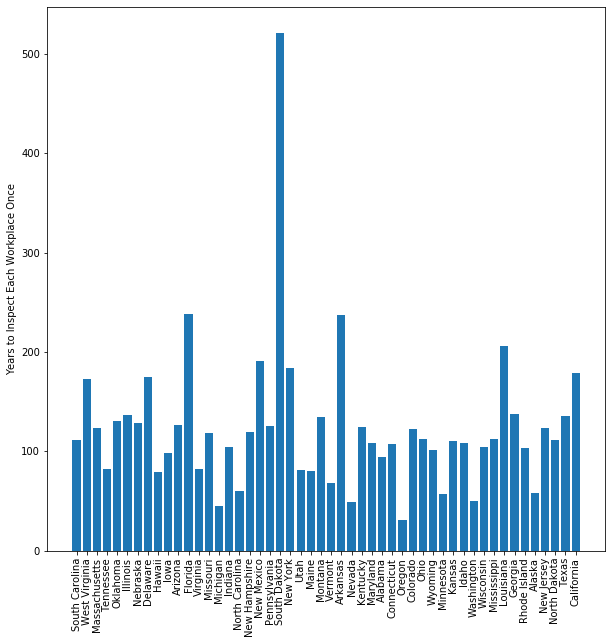

In [83]:
fig,ax= plt.subplots(1,1,figsize=(10,10))

ax.bar(range(50),df[df.columns[9]][0:50])
ax.set_xticks(range(50))
_=ax.set_xticklabels(state_names, rotation='vertical', fontsize=10)
_=ax.set_ylabel(df.columns[9])

Can we see a correation between fatality rate and frequency of inspections?

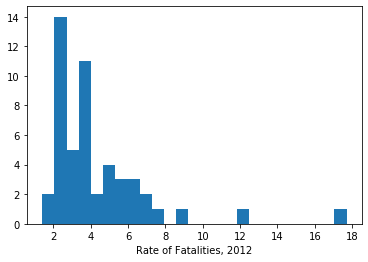

In [127]:
_=plt.hist(df[df.columns[2]][0:50],bins=25)
_=plt.xlabel(df.columns[2])

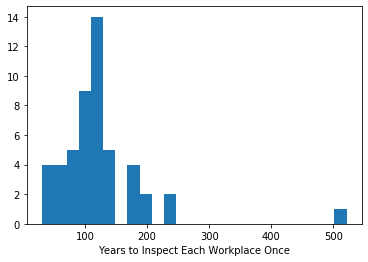

In [101]:
_=plt.hist(df[df.columns[9]][0:50],bins=25)
_=plt.xlabel(df.columns[9])

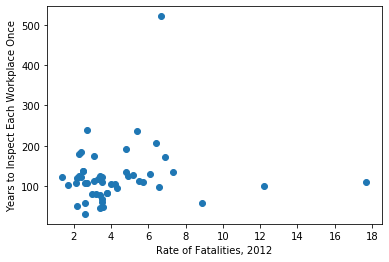

In [99]:
plt.scatter(df[df.columns[2]][0:50],df[df.columns[9]][0:50])
_=plt.xlabel(df.columns[2])
_=plt.ylabel(df.columns[9])

### Heart Data

[Source](https://www.kaggle.com/ronitf/heart-disease-uci/version/1#)

* *age*- age in years
* *sex*- (1 = male; 0 = female)
* *cp*- chest pain type
* *trestbps*- resting blood pressure (in mm Hg on admission to the hospital)
* *chol*- serum cholestoral in mg/dl
* *fbs*- (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
* *restecg*- resting electrocardiographic results
* *thalach*- maximum heart rate achieved
* *exang*- exercise induced angina (1 = yes; 0 = no)
* *oldpeak*- ST depression induced by exercise relative to rest
* *slope*- the slope of the peak exercise ST segment
* *ca*- number of major vessels (0-3) colored by flourosopy
* *thal*- 3 = normal; 6 = fixed defect; 7 = reversable defect
* *target*- 1 or 0


In [128]:
!head heart.csv

In [129]:
df_heart=pd.read_csv("heart.csv")

In [130]:
df_heart

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
0        0   0     1       1  
1        0   0     2       1  
2        2   0     2       1  
3        2   0     2       1  
4        2   0     2       1  
..     ...  ..   ...     ...  
298      1   0     3       0  
299      1   0     3       0  
300      1   2     3       0  
301      1   1     3       0  
302      1   1     2       0  

[303 rows x 14 columns]

As an exercise, lets use numpy to select different populations... we'll do it again with pandas only in a bit.

In [131]:
np_heart=np.array(df_heart)
np_heart.shape

(303, 14)

In [132]:
h_c_tmp=df_heart.columns.tolist()
h_columns=dict(zip(h_c_tmp,range(len(h_c_tmp))))
h_columns

{'age': 0,
 'sex': 1,
 'cp': 2,
 'trestbps': 3,
 'chol': 4,
 'fbs': 5,
 'restecg': 6,
 'thalach': 7,
 'exang': 8,
 'oldpeak': 9,
 'slope': 10,
 'ca': 11,
 'thal': 12,
 'target': 13}

In [133]:
h_c_tmp

['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal',
 'target']

In [135]:
np_heart[:,h_columns["cp"]]==0.

array([False, False, False, False,  True,  True, False, False, False,
       False,  True, False, False, False, False, False, False, False,
        True, False,  True, False,  True, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False,  True,  True, False,
       False, False, False, False,  True, False,  True, False, False,
       False, False,  True,  True, False,  True, False, False, False,
       False, False,  True, False, False, False,  True, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False,  True,
       False,  True, False, False, False,  True,  True,  True, False,
       False, False, False, False, False, False, False, False,  True,
       False,  True,  True, False, False,  True, False, False, False,
       False, False,  True,  True,  True, False, False, False, False,
        True, False,

In [136]:
index=np.where(np_heart[:,h_columns["cp"]]==0.)
index

(array([  4,   5,  10,  18,  20,  22,  31,  42,  43,  49,  51,  56,  57,
         59,  65,  69,  73,  84,  89,  91,  95,  96,  97, 107, 109, 110,
        113, 119, 120, 121, 126, 135, 138, 139, 141, 143, 150, 151, 155,
        165, 166, 167, 168, 169, 174, 175, 176, 178, 179, 180, 181, 182,
        184, 185, 186, 187, 189, 190, 191, 192, 193, 195, 197, 198, 199,
        200, 201, 202, 204, 205, 206, 207, 209, 211, 212, 213, 214, 215,
        217, 218, 219, 220, 221, 223, 224, 225, 227, 231, 232, 233, 234,
        235, 236, 237, 238, 239, 241, 242, 243, 244, 245, 246, 250, 251,
        252, 253, 255, 256, 257, 258, 260, 261, 262, 263, 264, 265, 266,
        268, 269, 270, 272, 273, 274, 275, 276, 279, 280, 281, 283, 284,
        285, 288, 289, 290, 291, 292, 294, 295, 296, 297, 298, 300, 301]),)

In [137]:
len(index[0])

143

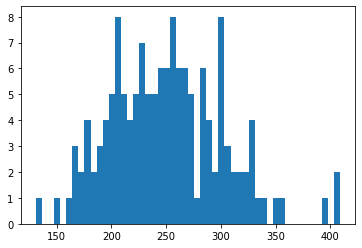

In [138]:
_=plt.hist(np_heart[index,h_columns["chol"]].flatten(),bins=50)

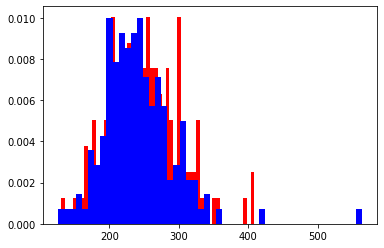

In [142]:
index=np.where(np_heart[:,h_columns["cp"]]==0)
_=plt.hist(np_heart[index,h_columns["chol"]].flatten(),color="r",bins=50,density=1.)
index=np.where(np_heart[:,h_columns["cp"]]!=0)
_=plt.hist(np_heart[index,h_columns["chol"]].flatten(),color="b",bins=50,density=1.)

In [144]:
index=np.where(np_heart[:,h_columns["cp"]]==0)
print (np.mean(np_heart[index,h_columns["chol"]].flatten()))
index=np.where(np_heart[:,h_columns["cp"]]!=0)
print (np.mean(np_heart[index,h_columns["chol"]].flatten()))

250.13286713286712
242.80625


In [145]:
index=np.where(np_heart[:,h_columns["cp"]]==0)
print (np.std(np_heart[index,h_columns["chol"]].flatten()))
index=np.where(np_heart[:,h_columns["cp"]]!=0)
print (np.std(np_heart[index,h_columns["chol"]].flatten()))

51.359862667049164
51.84333333165895


In [34]:
dict(zip(h_c_tmp,np.corrcoef(np.array(np_heart).transpose())[h_columns["cp"]]))

{'age': -0.06865301584014483,
 'sex': -0.049352875346989386,
 'cp': 1.0,
 'trestbps': 0.04760776064464842,
 'chol': -0.07690439103320763,
 'fbs': 0.09444403499533158,
 'restecg': 0.04442059251016377,
 'thalach': 0.2957621245879105,
 'exang': -0.39428026849502146,
 'oldpeak': -0.14923015809708068,
 'slope': 0.11971658853470613,
 'ca': -0.18105302605349535,
 'thal': -0.1617355705100218,
 'target': 0.4337982615068934}

## Better Visualization ...

Let's first think of what type of plots may be useful in a data science context.

In [146]:
df=df_heart

## Histograms

As discussed throughout the course, a dataset typically consists of data points, each of which is a set of observations of the same set of random variables. What we are describing is a table, with each row corresponding to a data point, and each column a random variable. 


(array([ 12.,  73., 106.,  69.,  35.,   3.,   4.,   0.,   0.,   1.]),
 array([126. , 169.8, 213.6, 257.4, 301.2, 345. , 388.8, 432.6, 476.4,
        520.2, 564. ]),
 <a list of 10 Patch objects>)

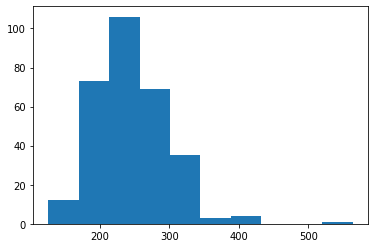

In [147]:
plt.hist(df["chol"])

(array([ 2.,  1.,  2.,  2.,  5., 11.,  7.,  9., 24., 22., 18., 23., 22.,
        23., 20., 18., 18., 14.,  9., 10., 15.,  6.,  7.,  4.,  3.,  1.,
         2.,  0.,  0.,  0.,  1.,  0.,  2.,  1.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([126.  , 134.76, 143.52, 152.28, 161.04, 169.8 , 178.56, 187.32,
        196.08, 204.84, 213.6 , 222.36, 231.12, 239.88, 248.64, 257.4 ,
        266.16, 274.92, 283.68, 292.44, 301.2 , 309.96, 318.72, 327.48,
        336.24, 345.  , 353.76, 362.52, 371.28, 380.04, 388.8 , 397.56,
        406.32, 415.08, 423.84, 432.6 , 441.36, 450.12, 458.88, 467.64,
        476.4 , 485.16, 493.92, 502.68, 511.44, 520.2 , 528.96, 537.72,
        546.48, 555.24, 564.  ]),
 <a list of 50 Patch objects>)

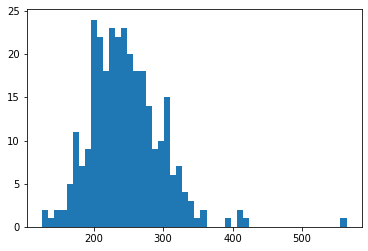

In [148]:
plt.hist(df["chol"],bins=50)

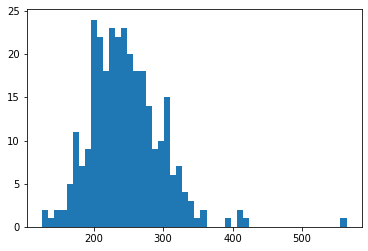

In [149]:
_=plt.hist(df["chol"],bins=50)

In [150]:
cp_0_selection=df["cp"]==0
cp_not_0_selection=df["cp"]!=0

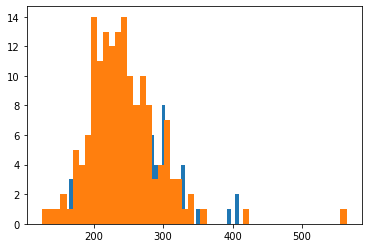

In [151]:
_=plt.hist(df[cp_0_selection]["chol"],bins=50)
_=plt.hist(df[cp_not_0_selection]["chol"],bins=50)

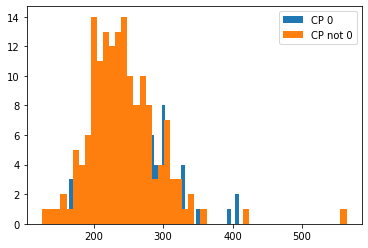

In [152]:
_=plt.hist(df[cp_0_selection]["chol"],bins=50,label="CP 0")
_=plt.hist(df[cp_not_0_selection]["chol"],bins=50,label="CP not 0")
_=plt.legend()

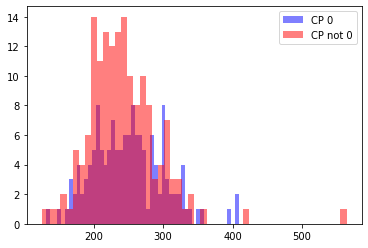

In [153]:
_=plt.hist(df[cp_0_selection]["chol"],bins=50,alpha=.5,color='b',label="CP 0")
_=plt.hist(df[cp_not_0_selection]["chol"],bins=50,alpha=.5,color='r',label="CP not 0")
_=plt.legend()

In [154]:
print(np.sum(cp_0_selection))
print(np.sum(cp_not_0_selection))

143
160


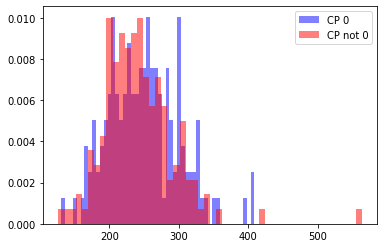

In [12]:
_=plt.hist(df[cp_0_selection]["chol"],bins=50,alpha=.5,color='b',density=1,label="CP 0")
_=plt.hist(df[cp_not_0_selection]["chol"],bins=50,alpha=.5,color='r',density=1,label="CP not 0")
_=plt.legend()

In [155]:
def compare_distributions(df,column_name,selections,**kwargs):
    for label,selection in selections.items():        
        _=plt.hist(df[selection][column_name],label=label,**kwargs)

    _=plt.legend()


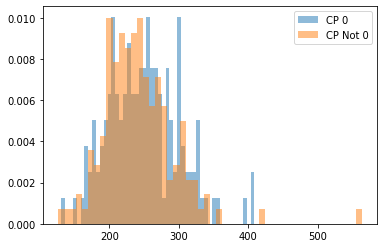

In [156]:
compare_distributions(df,"chol",
                     {"CP 0":df["cp"]==0.,
                      "CP Not 0":df["cp"]!=0},
                     alpha=0.5,
                     density=1,
                     bins=50,
                     )

age


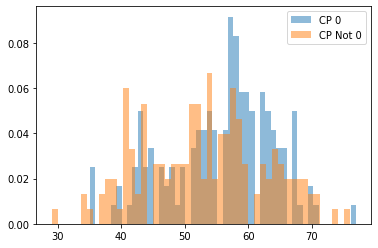

sex


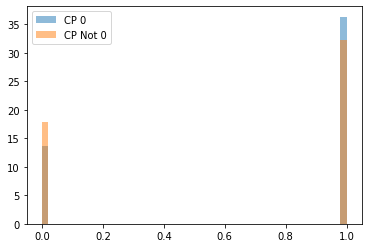

cp


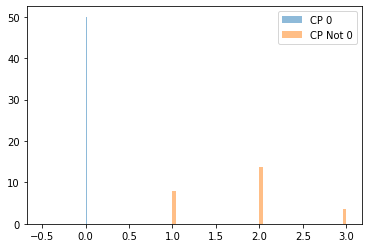

trestbps


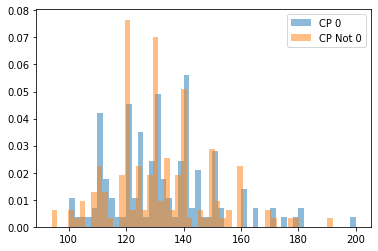

chol


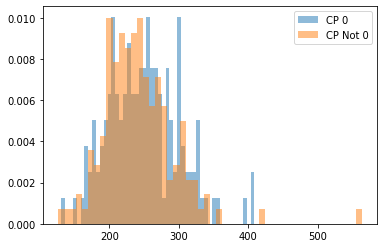

fbs


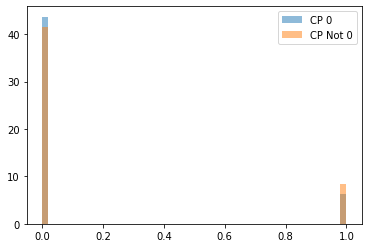

restecg


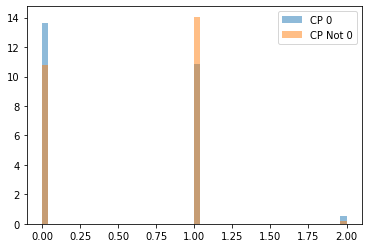

thalach


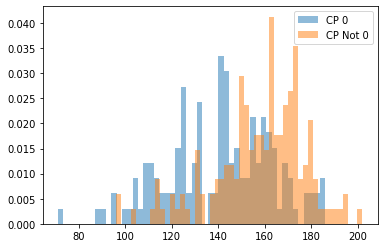

exang


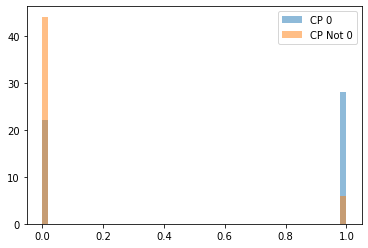

oldpeak


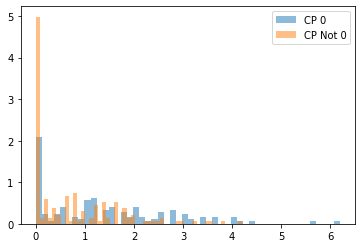

slope


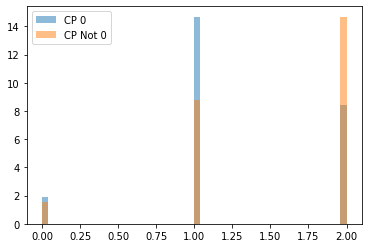

ca


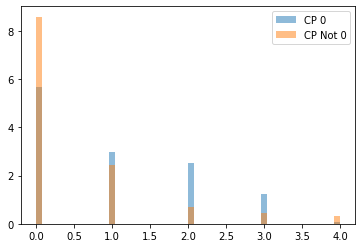

thal


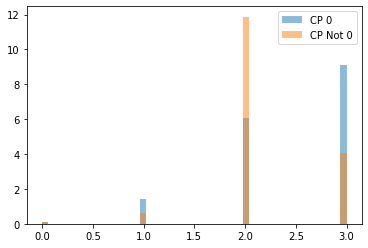

target


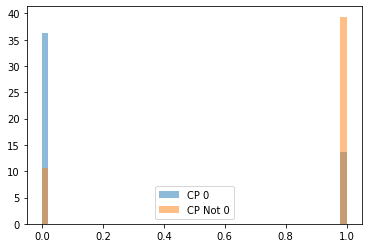

In [157]:
selection_dict={"CP 0":df["cp"]==0.,"CP Not 0":df["cp"]!=0}

for column_name in df.columns:
    print(column_name)
    compare_distributions(df,column_name,
                     selection_dict,
                     alpha=0.5,
                     density=1,
                     bins=50,
                     )
    plt.show()

In [158]:
len(df.columns)

14

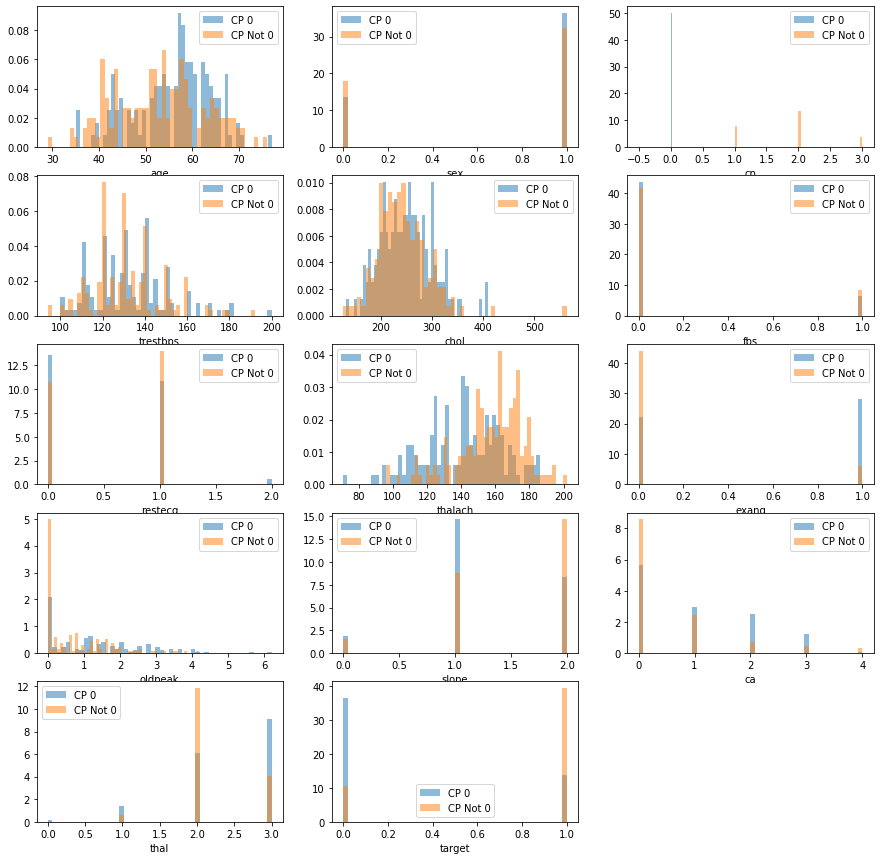

In [159]:
selection_dict={"CP 0":df["cp"]==0.,"CP Not 0":df["cp"]!=0}

plt.figure(figsize=(15,15))

for i,column_name in enumerate(df.columns):
    plt.subplot(5,3,i+1)
    compare_distributions(df,column_name,
                     selection_dict,
                     alpha=0.5,
                     density=1,
                     bins=50,
                     stacked=True
                     )
    plt.xlabel(column_name)
plt.show()

## 1-D Plots

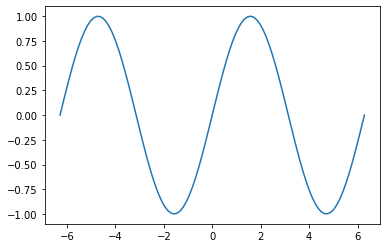

In [160]:
import math

x = np.linspace(-2.*math.pi,2.*math.pi,100)
y = list(map(math.sin,x))

_=plt.plot(x,y)

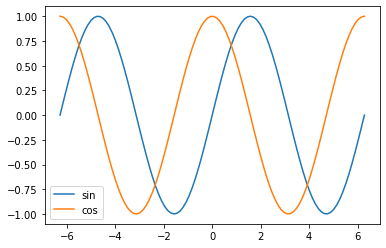

In [161]:
x = np.linspace(-2.*math.pi,2.*math.pi,100)
y_1 = list(map(math.sin,x))
y_2 = list(map(math.cos,x))

_=plt.plot(x,y_1,label="sin")
_=plt.plot(x,y_2,label="cos")

_=plt.legend()

In [162]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

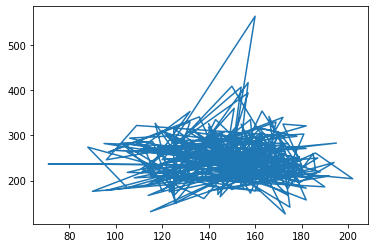

In [163]:
_=plt.plot(df["thalach"],df["chol"])

## 2-D Plots

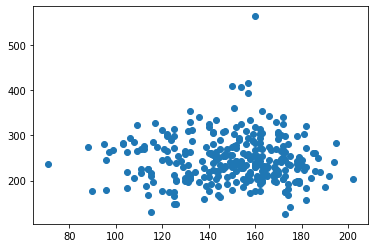

In [164]:
_=plt.scatter(df["thalach"],df["chol"])

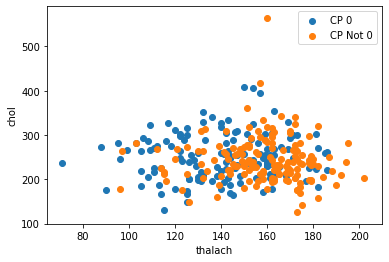

In [165]:
selection_dict={"CP 0":df["cp"]==0.,"CP Not 0":df["cp"]!=0}

for label,selection in selection_dict.items():   
    _=plt.scatter(df[selection]["thalach"],df[selection]["chol"],label=label)

_=plt.xlabel("thalach")
_=plt.ylabel("chol")

_=plt.legend()


In [166]:
selection_dict={"CP 0":df["cp"]==0.,"CP Not 0":df["cp"]!=0}

def compare_scatter(df,x_var_name,y_var_name,selections,make_legend=True) :
    for label,selection in selections.items():   
        _=plt.scatter(df[selection][x_var_name],df[selection][y_var_name],label=label)

    _=plt.xlabel(x_var_name)
    _=plt.ylabel(y_var_name)

    if make_legend:
        _=plt.legend()



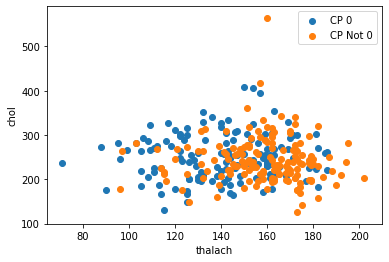

In [167]:
compare_scatter(df,"thalach","chol",selection_dict)

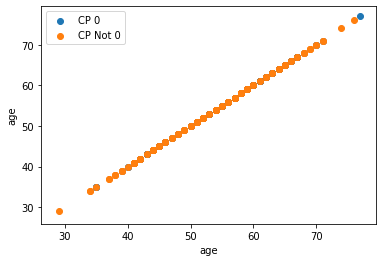

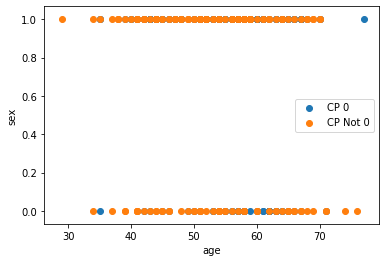

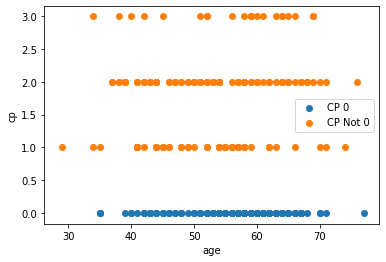

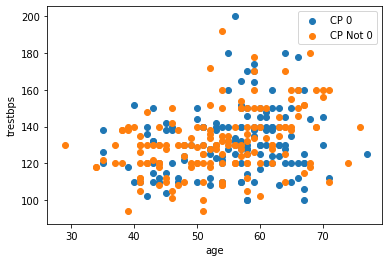

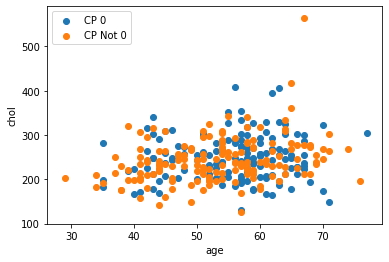

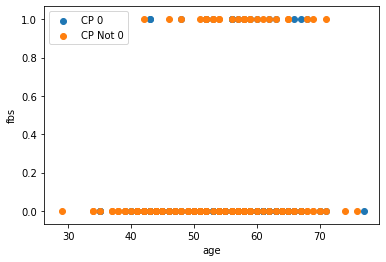

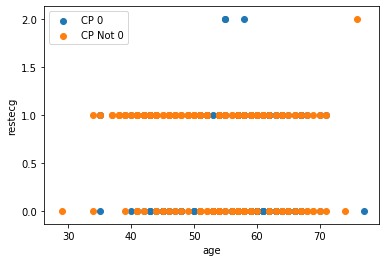

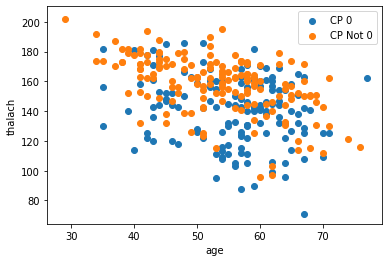

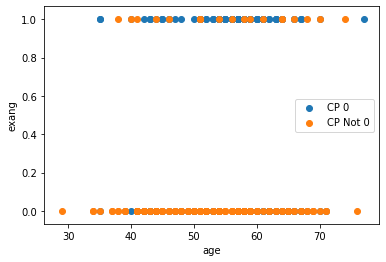

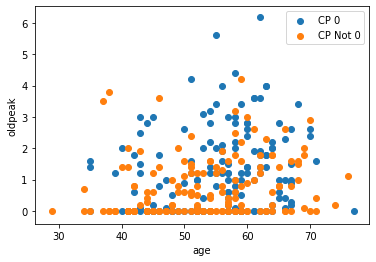

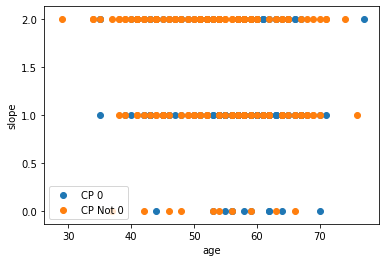

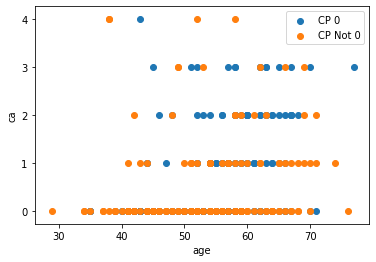

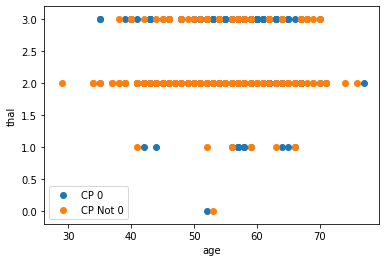

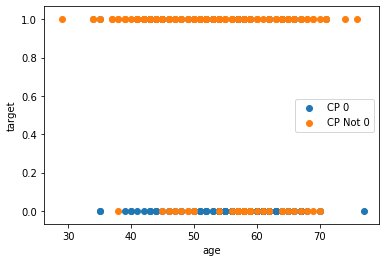

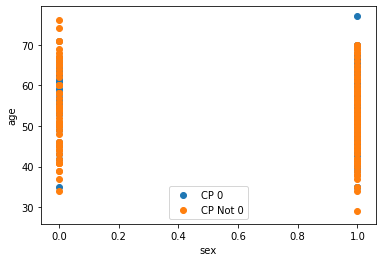

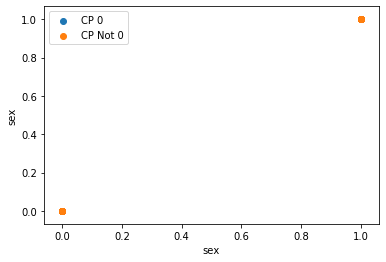

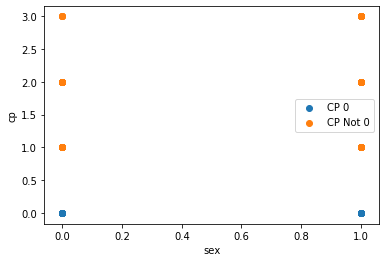

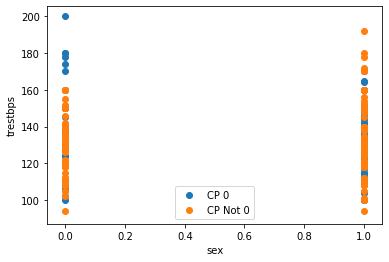

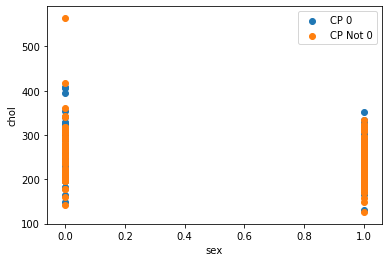

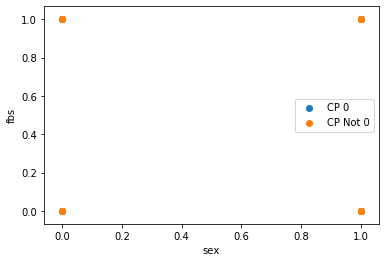

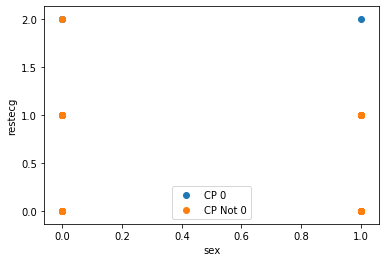

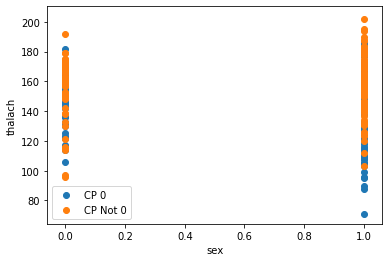

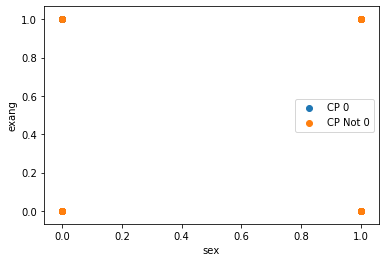

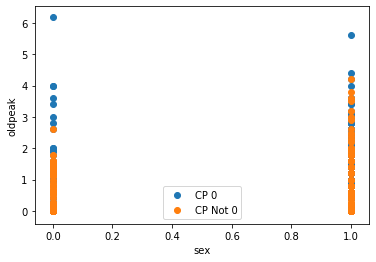

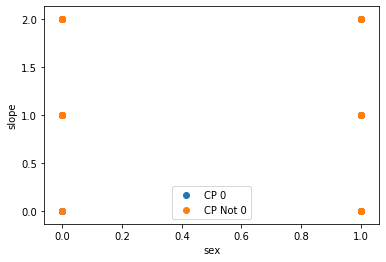

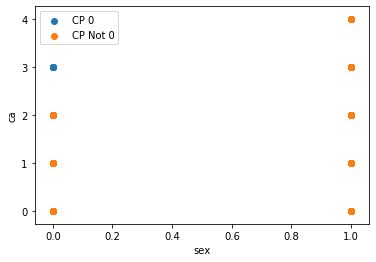

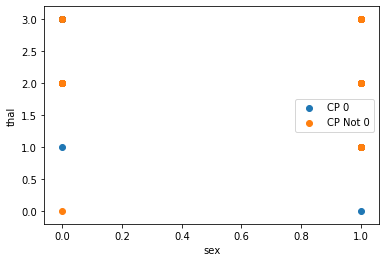

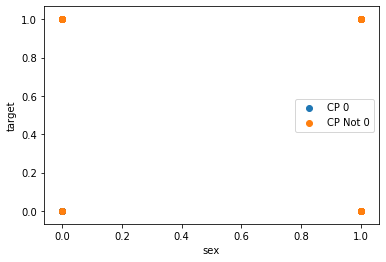

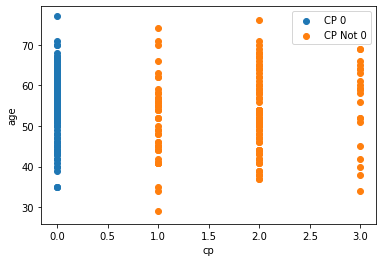

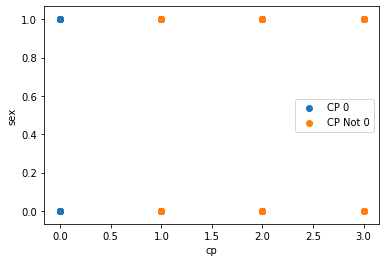

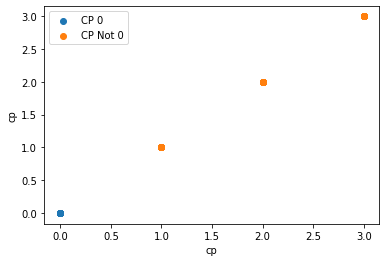

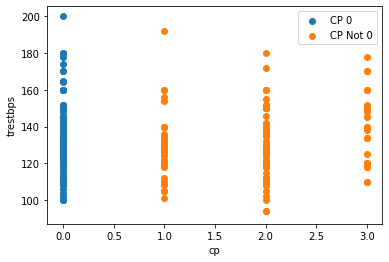

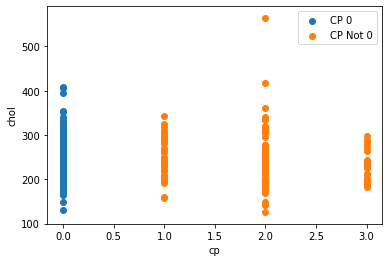

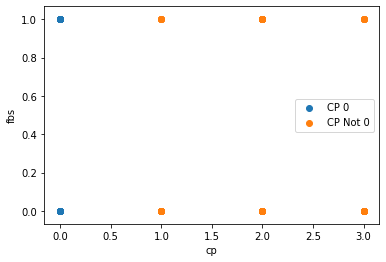

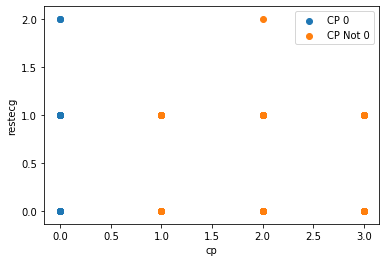

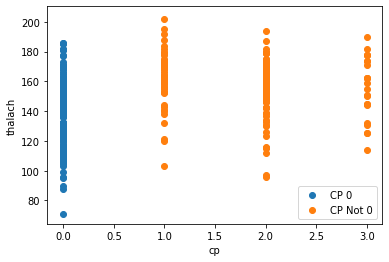

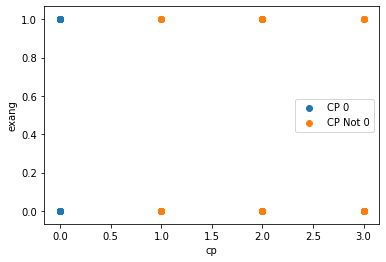

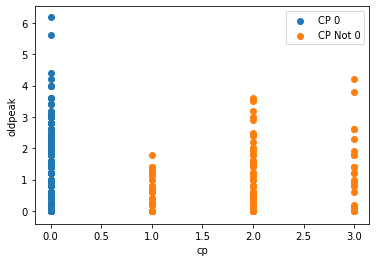

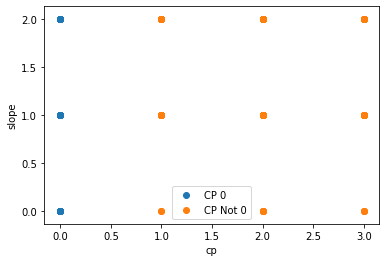

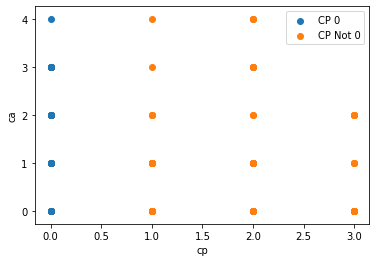

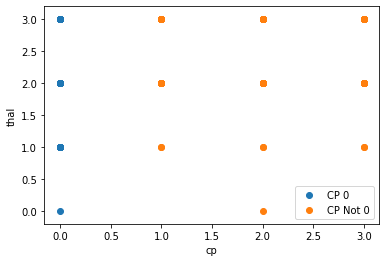

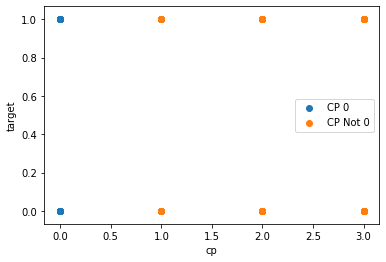

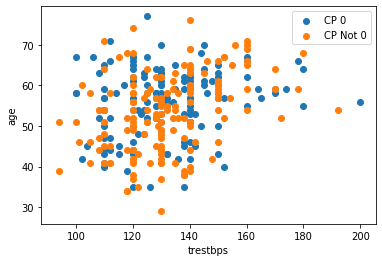

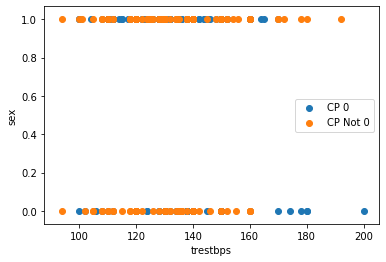

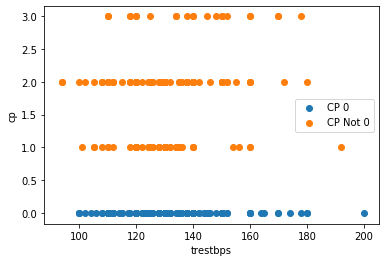

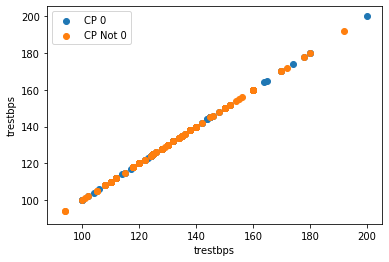

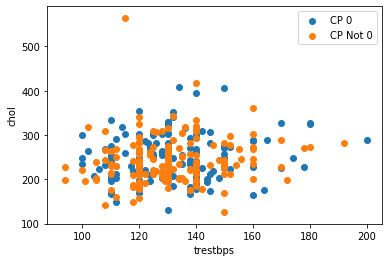

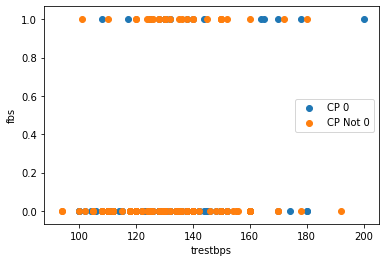

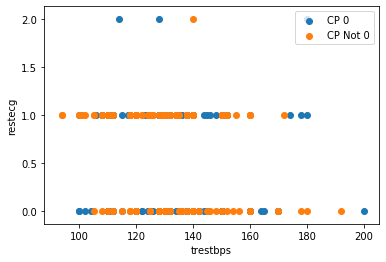

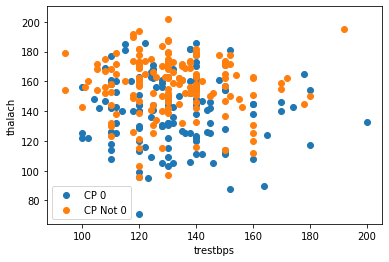

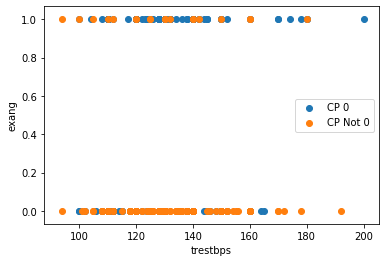

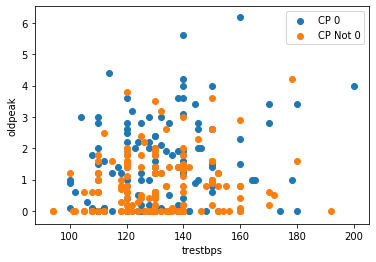

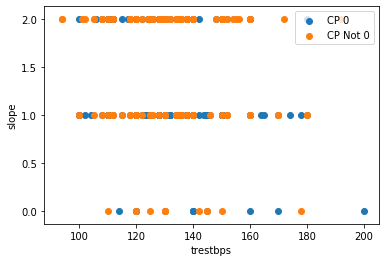

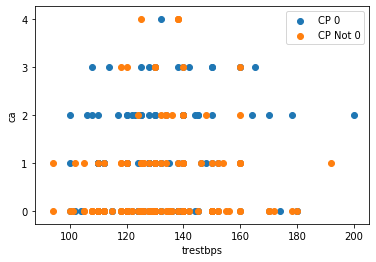

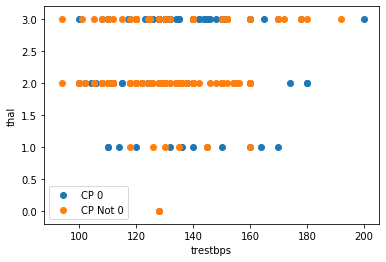

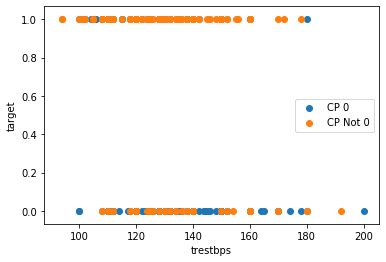

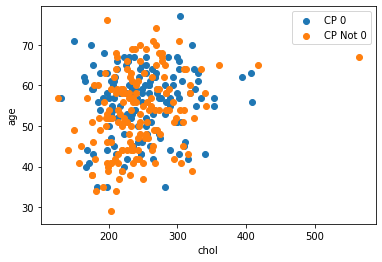

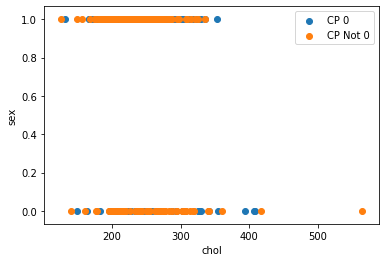

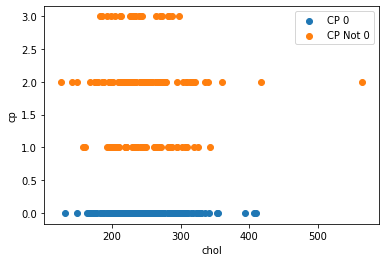

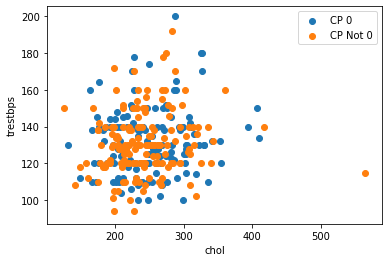

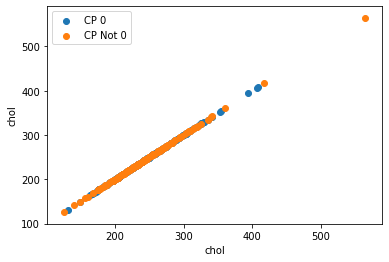

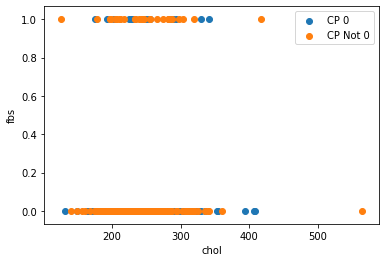

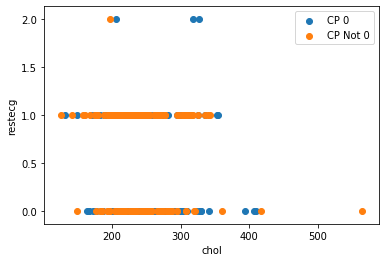

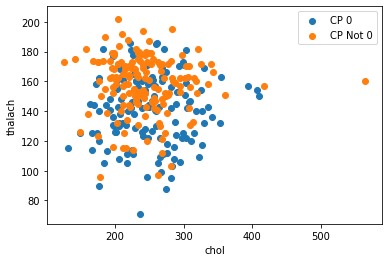

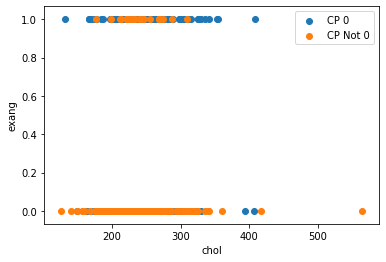

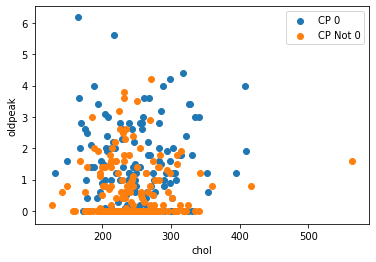

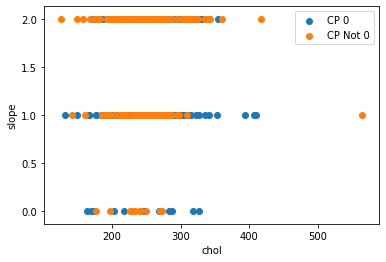

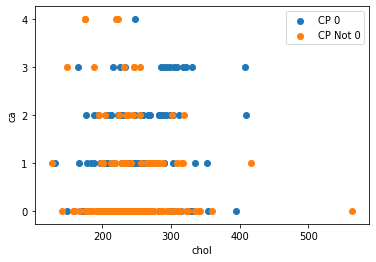

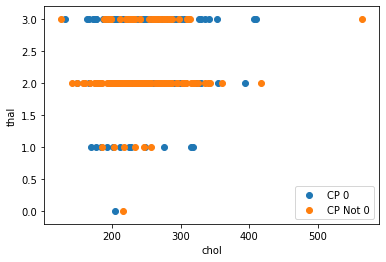

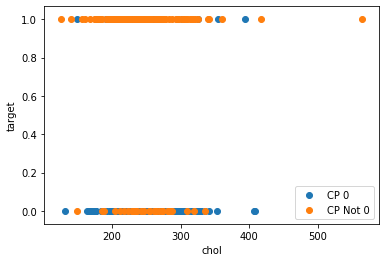

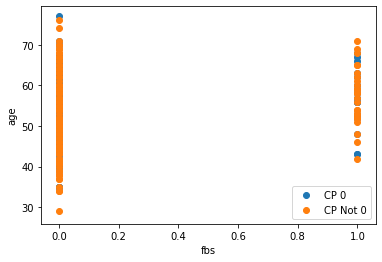

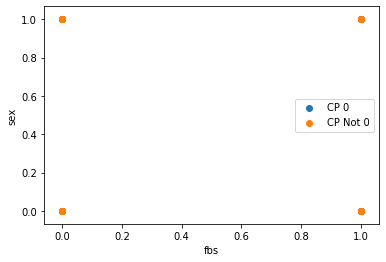

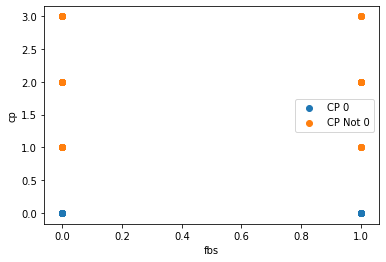

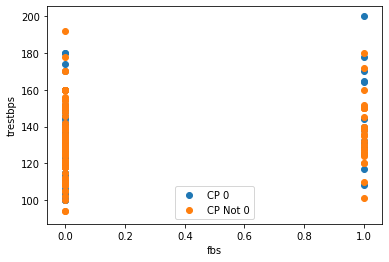

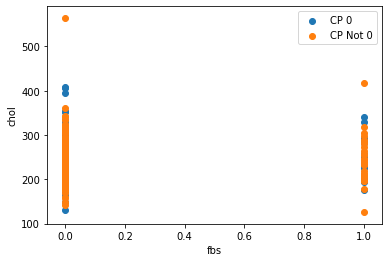

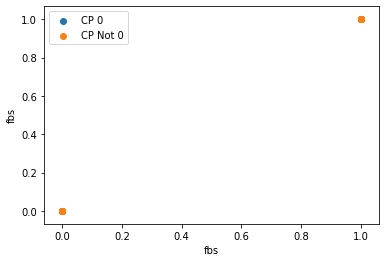

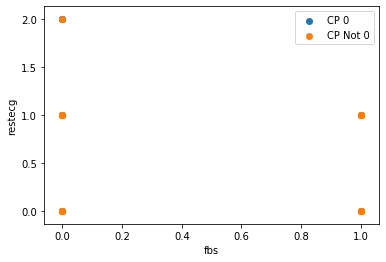

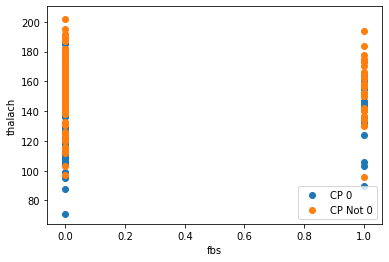

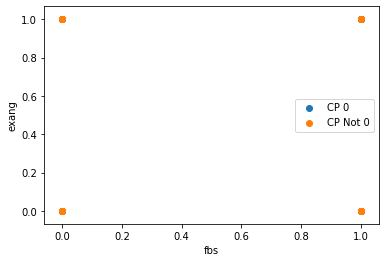

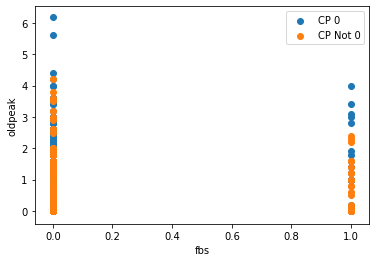

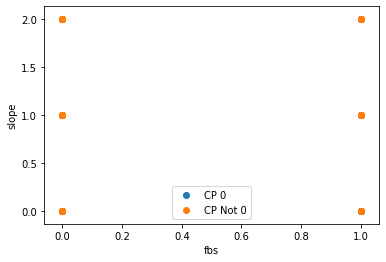

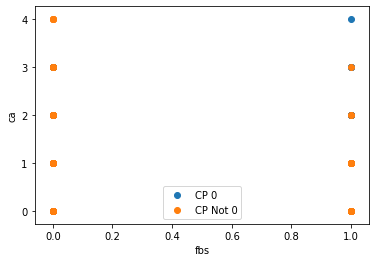

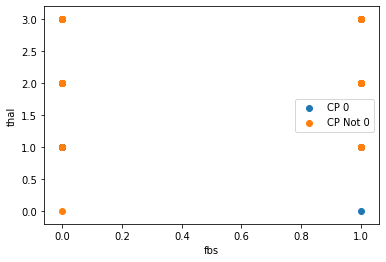

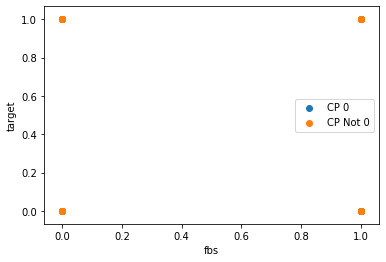

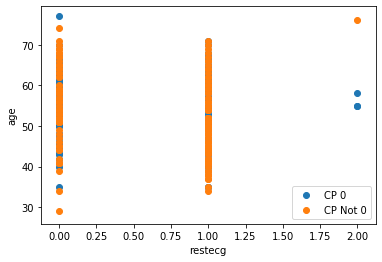

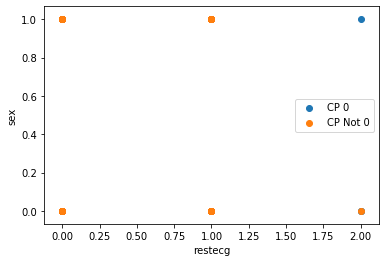

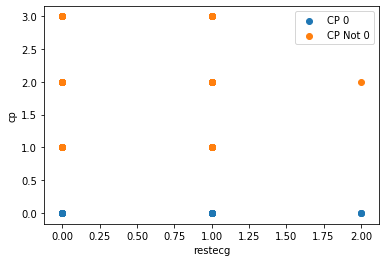

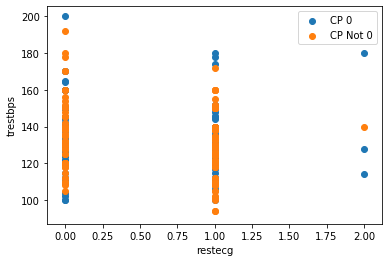

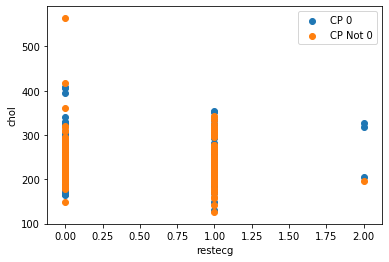

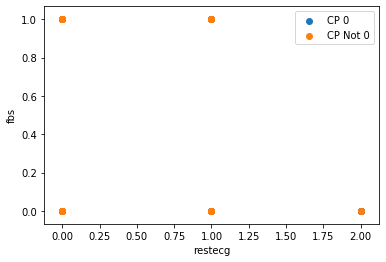

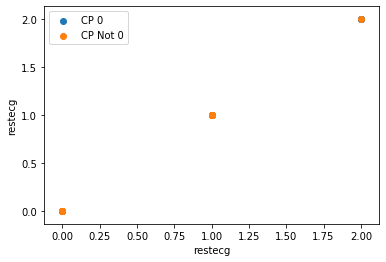

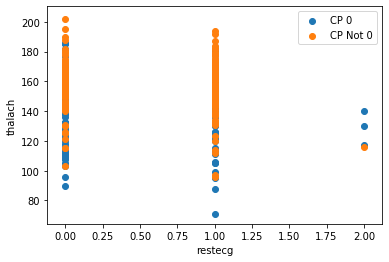

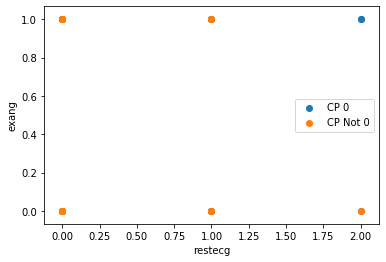

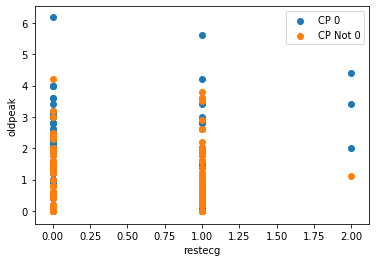

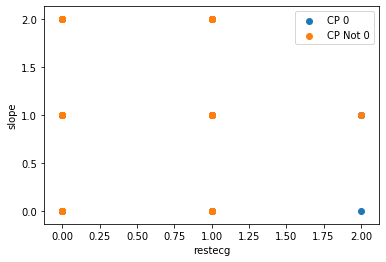

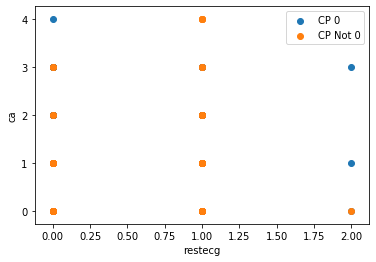

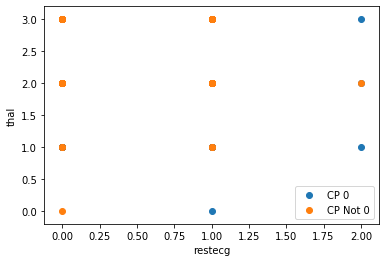

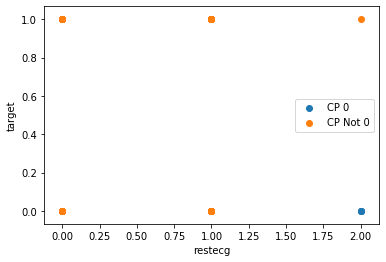

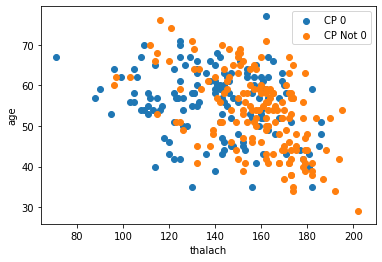

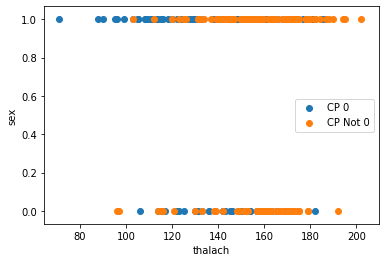

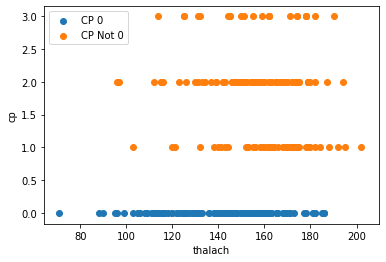

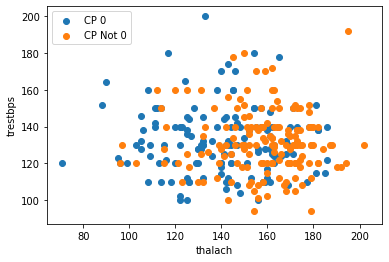

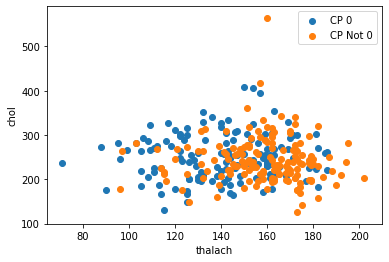

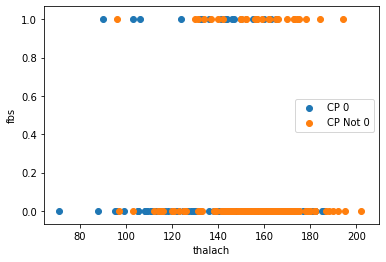

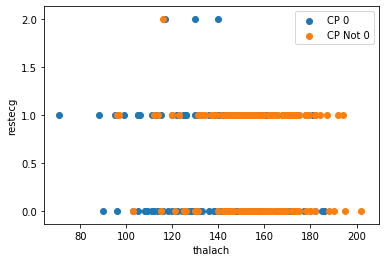

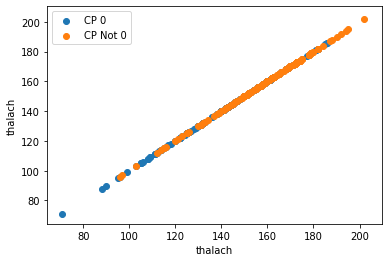

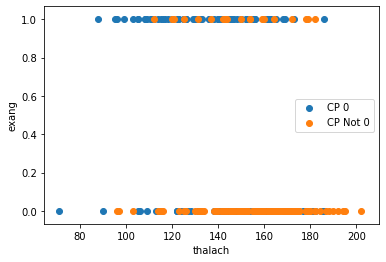

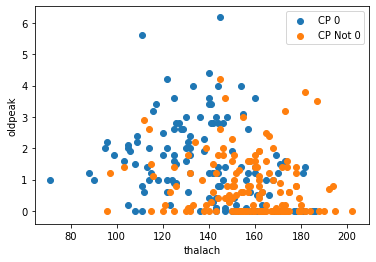

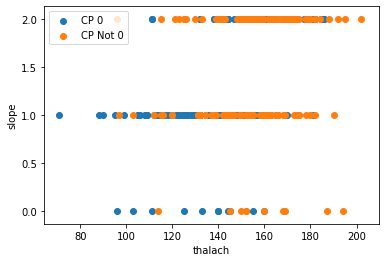

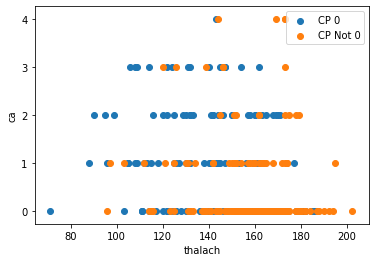

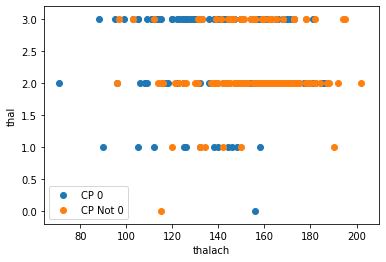

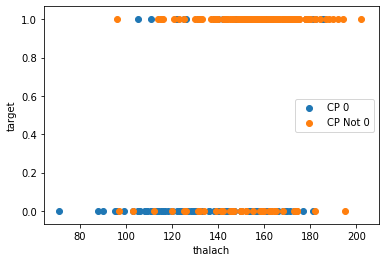

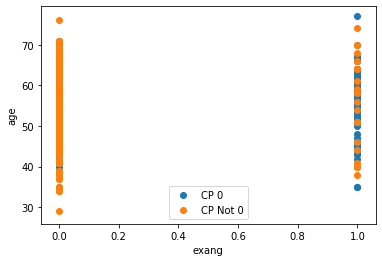

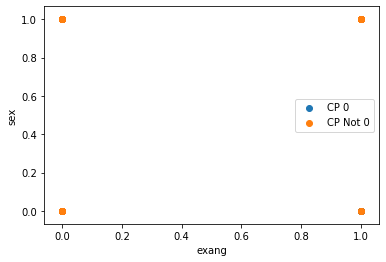

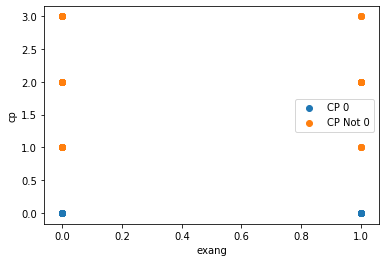

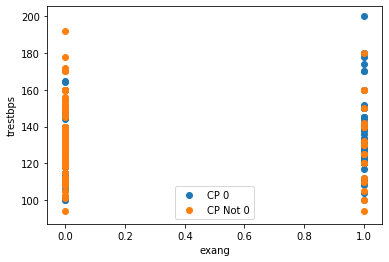

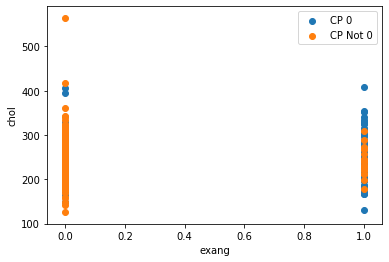

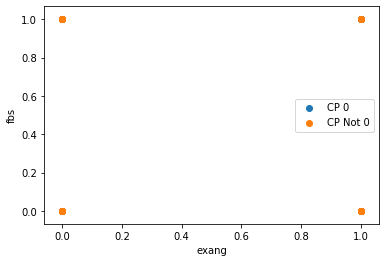

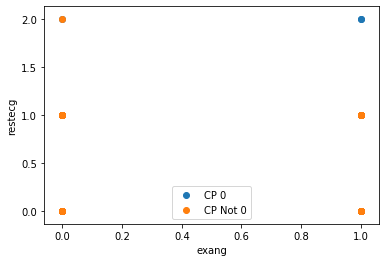

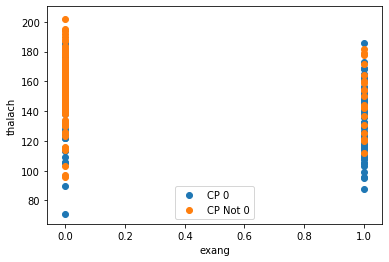

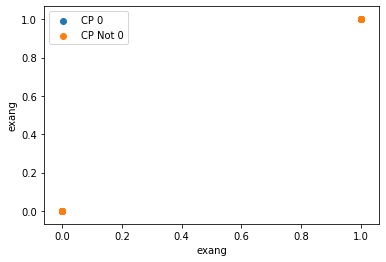

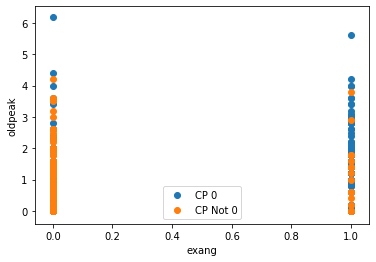

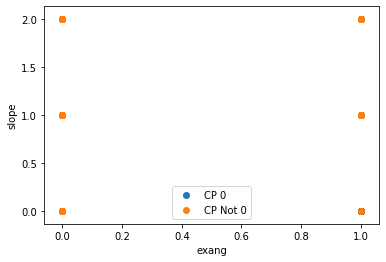

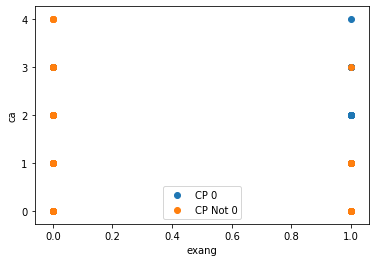

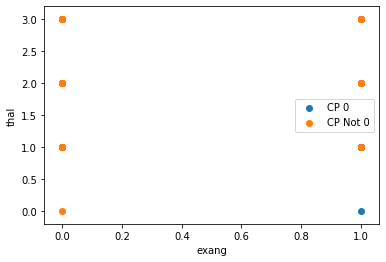

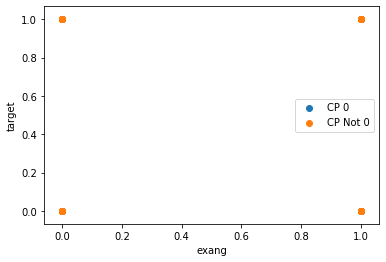

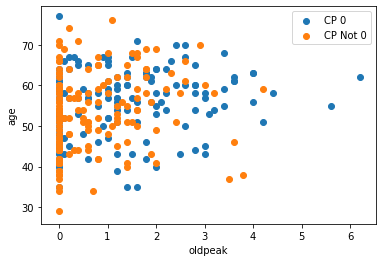

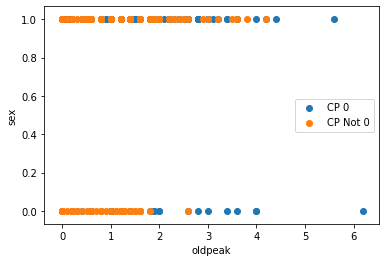

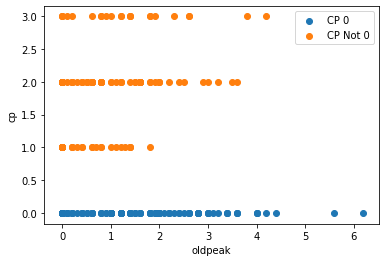

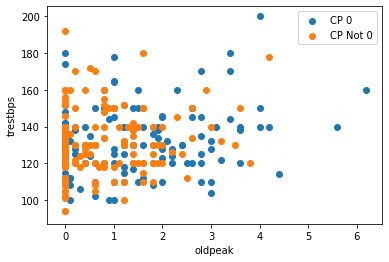

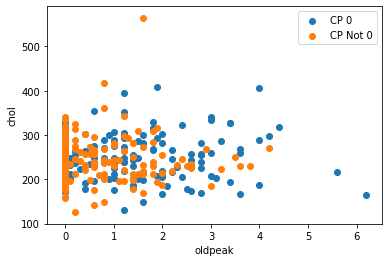

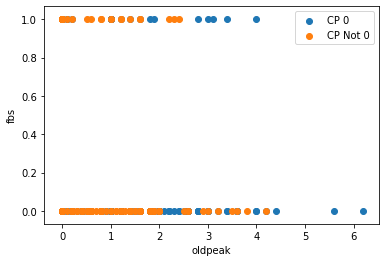

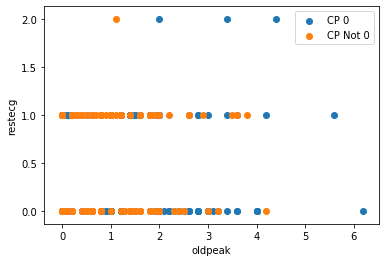

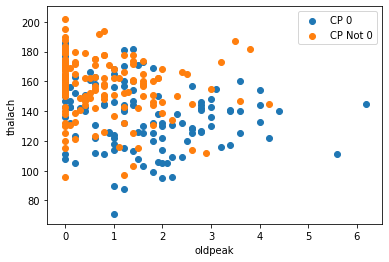

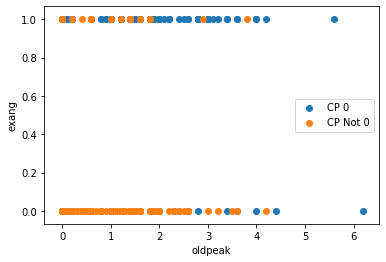

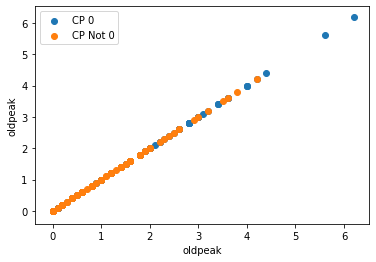

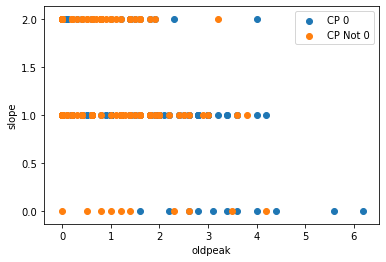

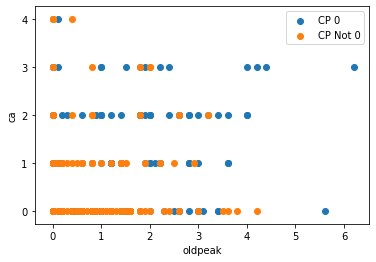

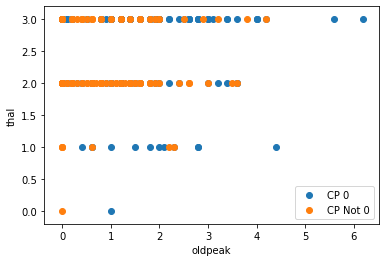

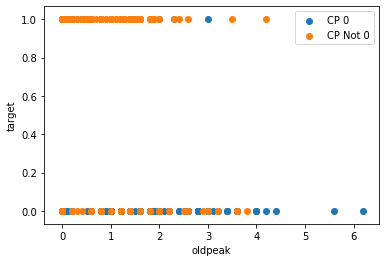

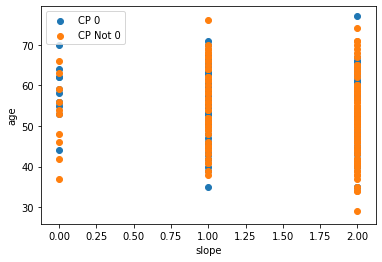

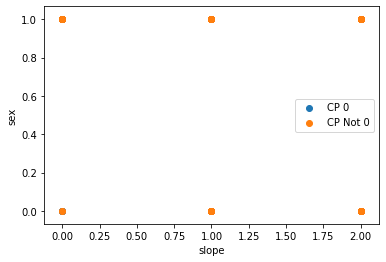

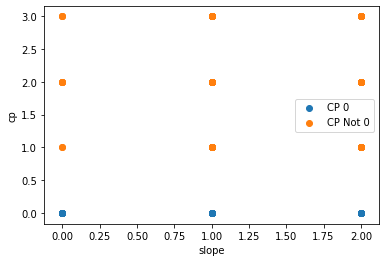

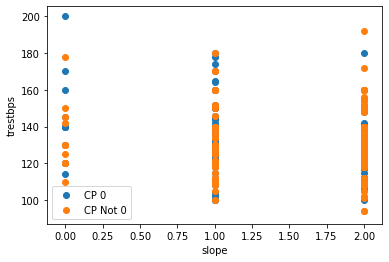

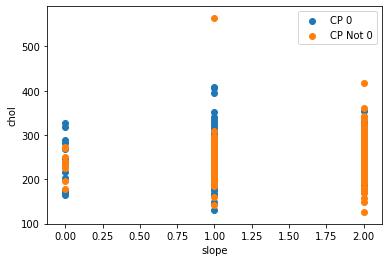

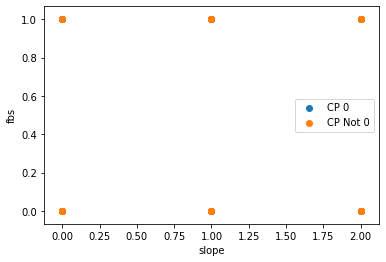

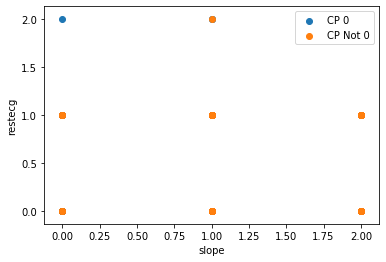

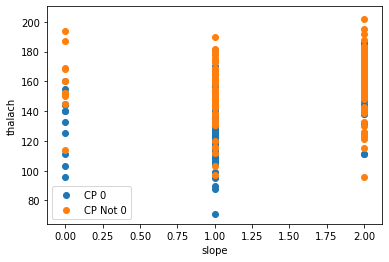

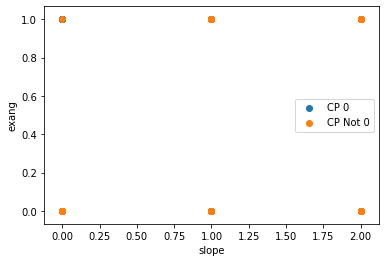

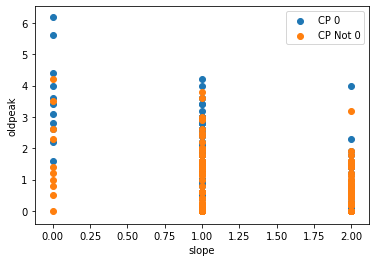

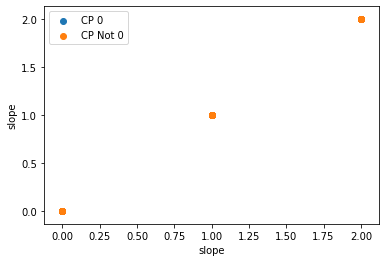

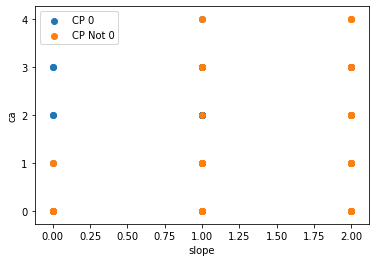

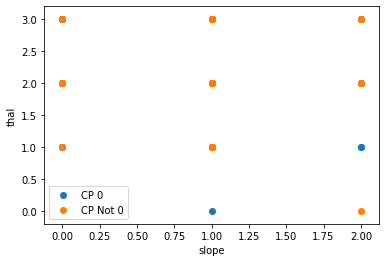

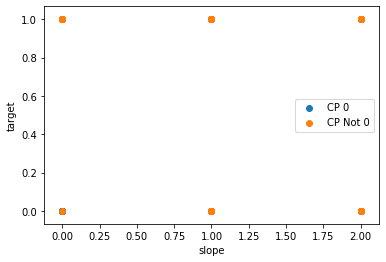

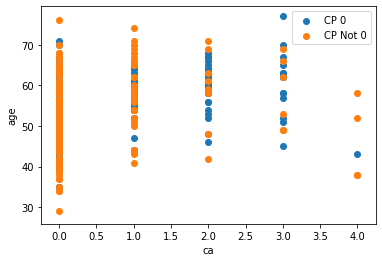

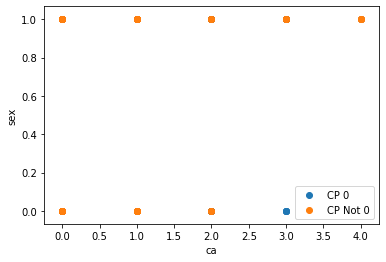

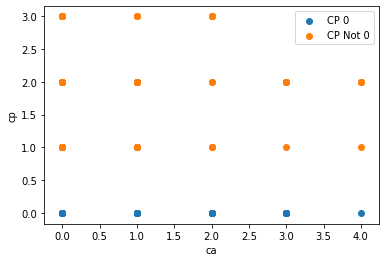

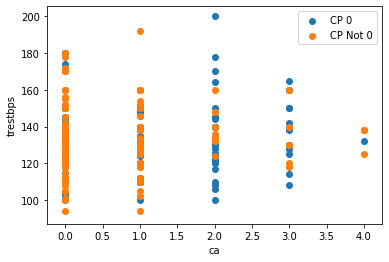

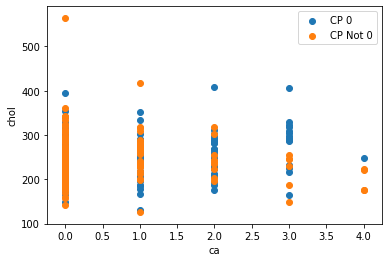

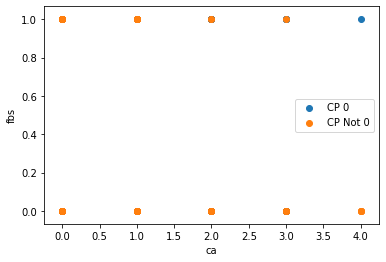

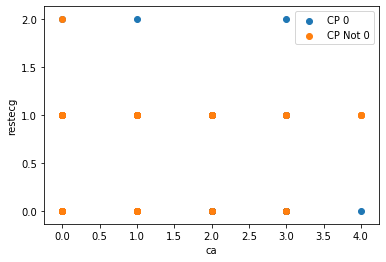

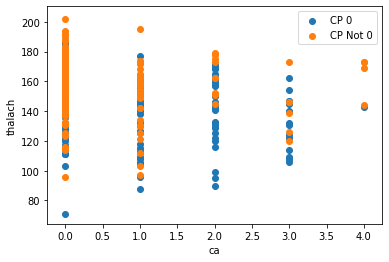

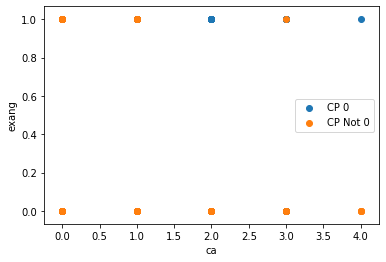

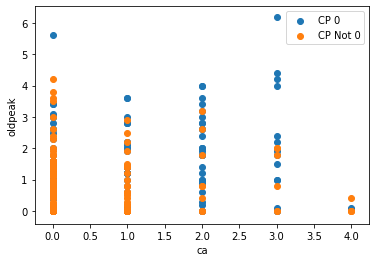

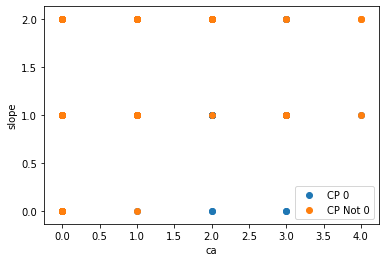

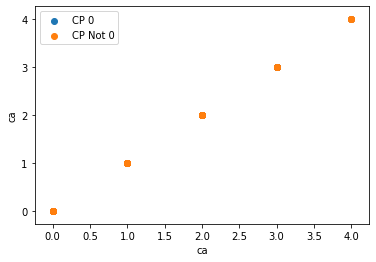

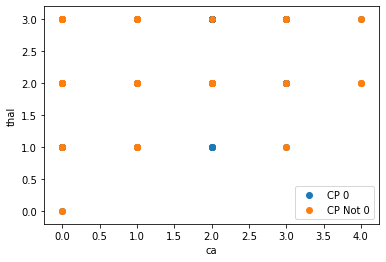

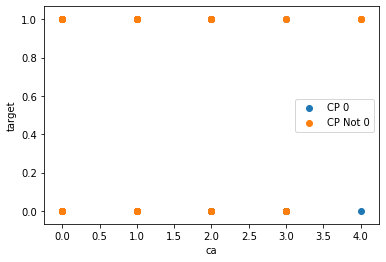

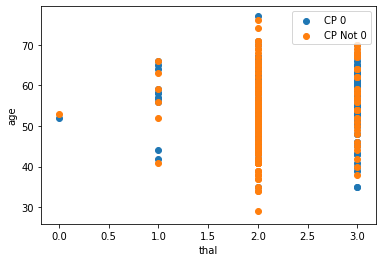

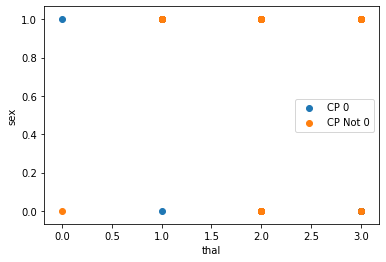

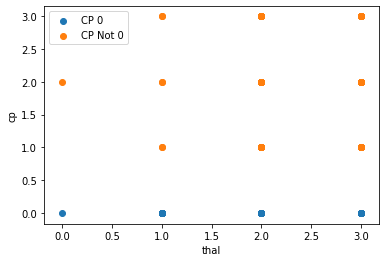

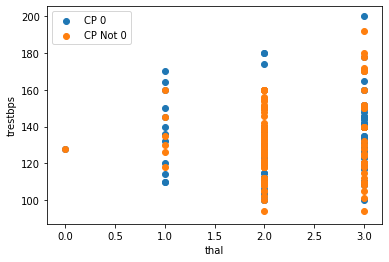

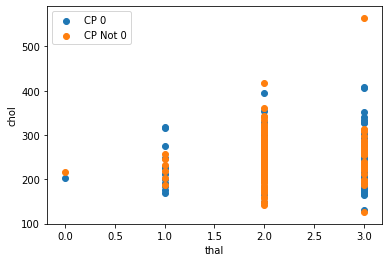

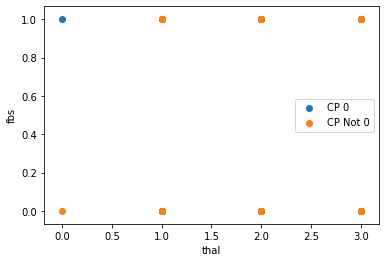

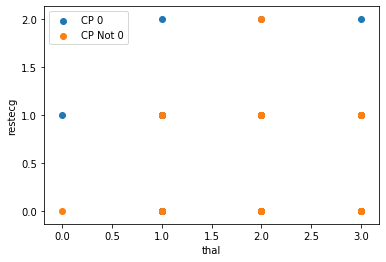

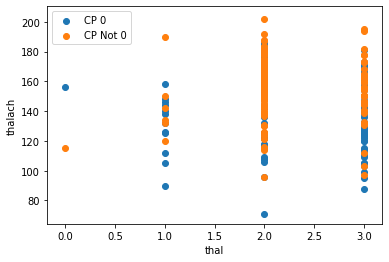

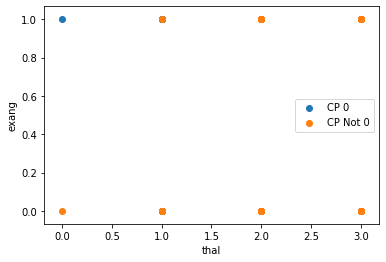

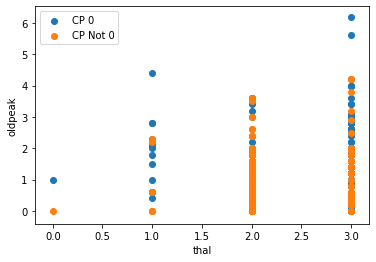

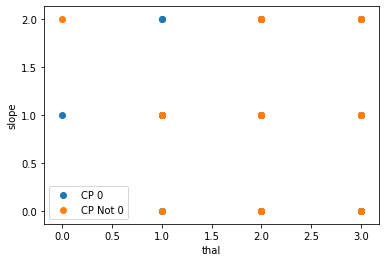

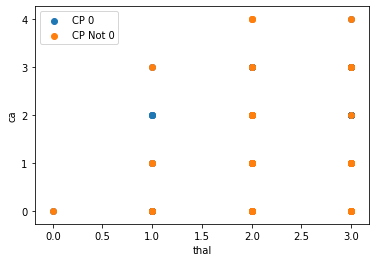

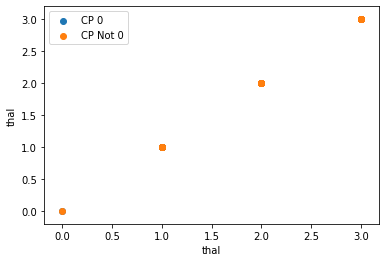

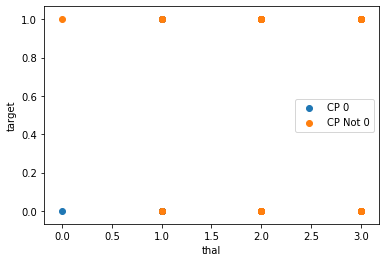

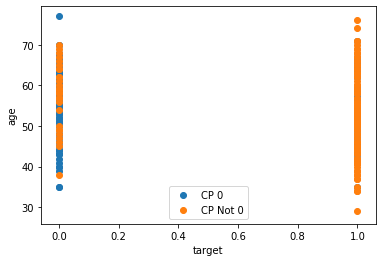

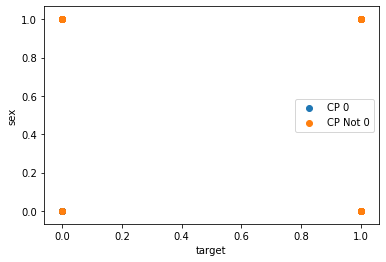

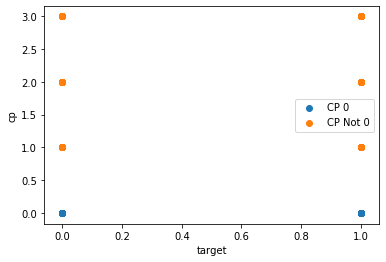

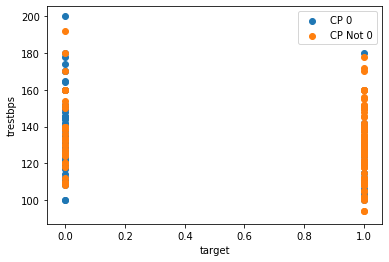

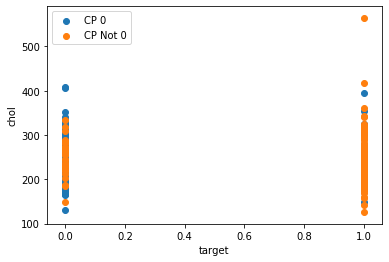

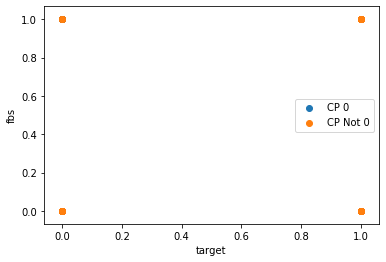

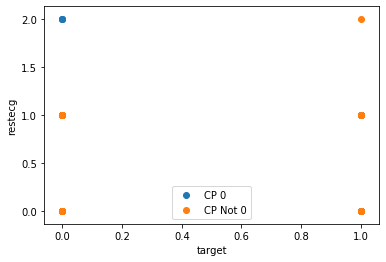

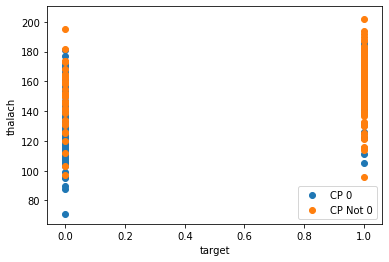

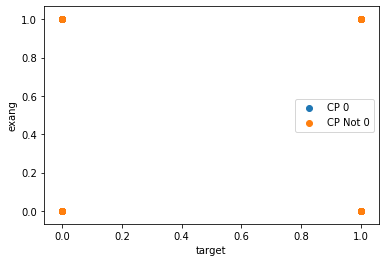

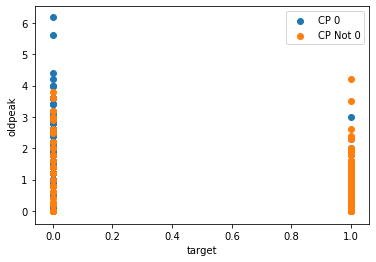

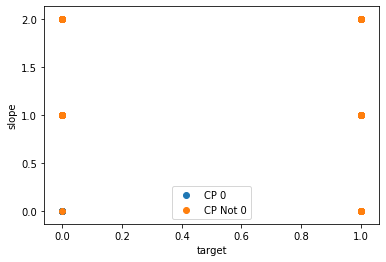

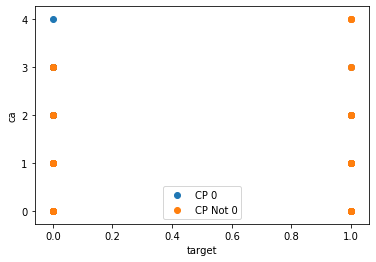

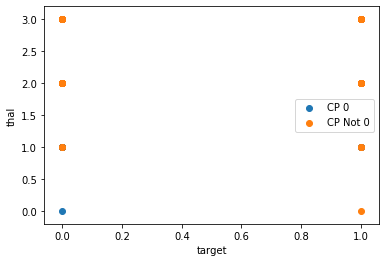

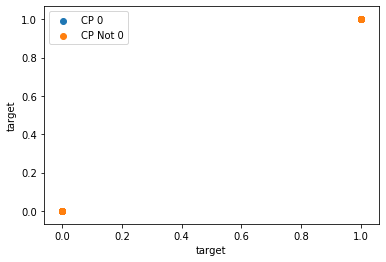

In [168]:
for x_var_name in df.columns:
    for y_var_name in df.columns:
        compare_scatter(df,x_var_name,y_var_name,selection_dict)
        plt.show()


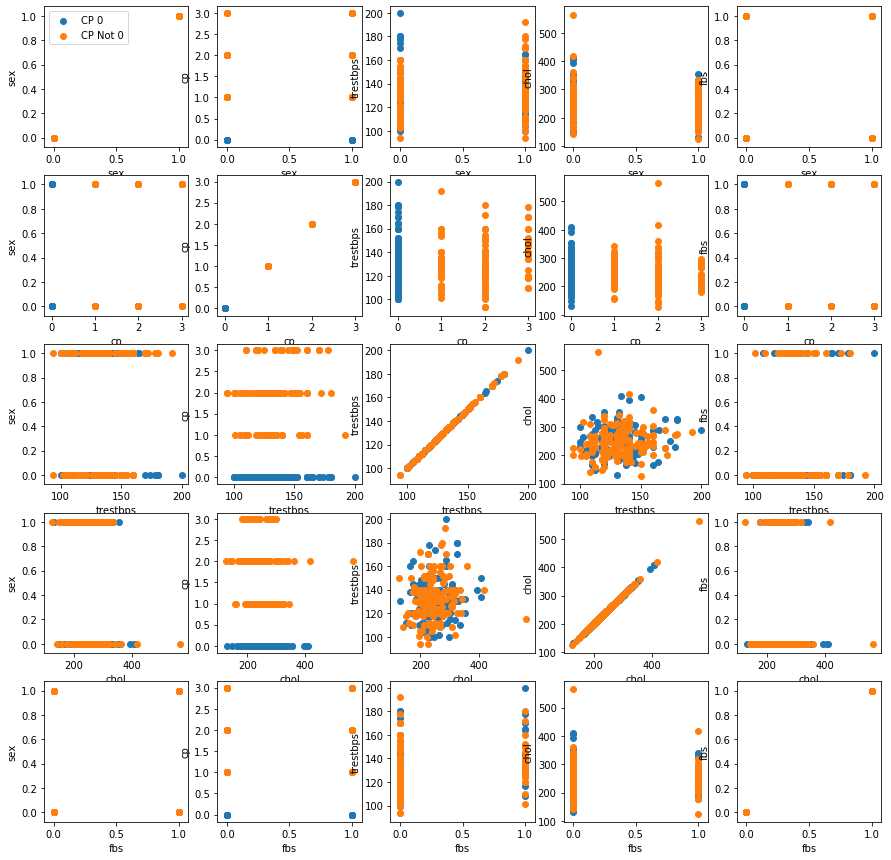

In [28]:
columns = df.columns[1:6]
n_columns=len(columns)
plt.figure(figsize=(15,15))

plot_i=0
for i,x_var_name in enumerate(columns):
    for j,y_var_name in enumerate(columns):
        plot_i+=1
        plt.subplot(n_columns,n_columns,plot_i)
        make_legend = plot_i==1
        compare_scatter(df,x_var_name,y_var_name,selection_dict,make_legend=make_legend)



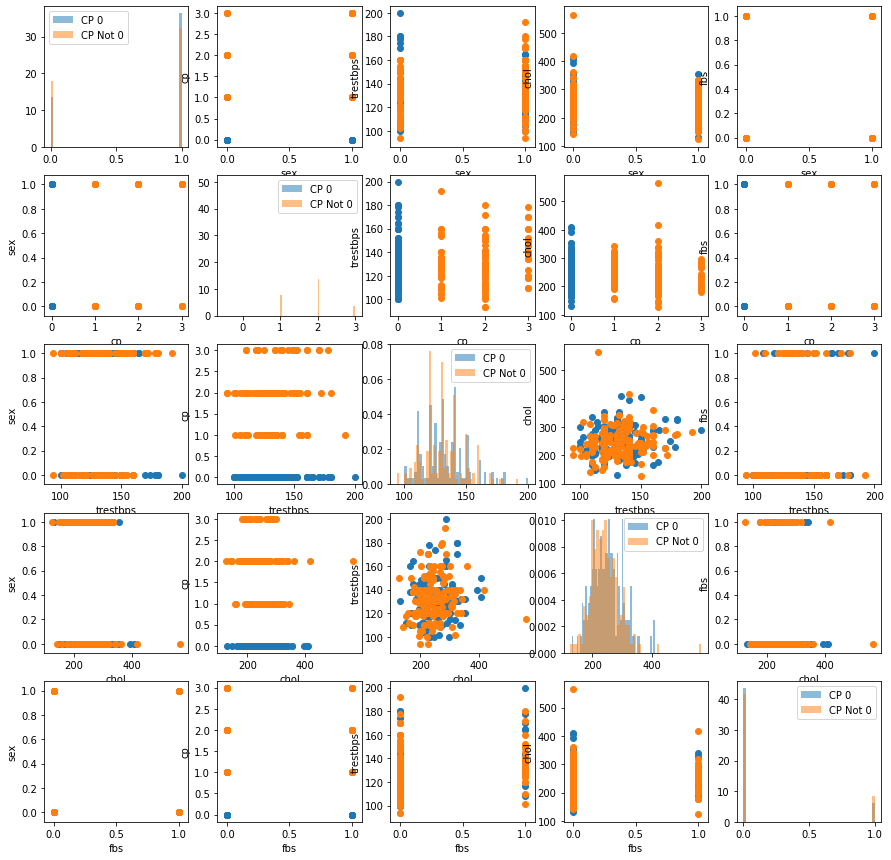

In [29]:
# Pair plot

columns = df.columns[1:6]
n_columns=len(columns)
plt.figure(figsize=(15,15))

plot_i=0
for i,x_var_name in enumerate(columns):
    for j,y_var_name in enumerate(columns):
        plot_i+=1
        plt.subplot(n_columns,n_columns,plot_i)
        make_legend = plot_i==1
        if i==j:
            compare_distributions(df,x_var_name,
                     selection_dict,
                     alpha=0.5,
                     density=1,
                     bins=50,
                     )
        else:
            compare_scatter(df,x_var_name,y_var_name,selection_dict,make_legend=make_legend)

In [169]:
import seaborn as sns

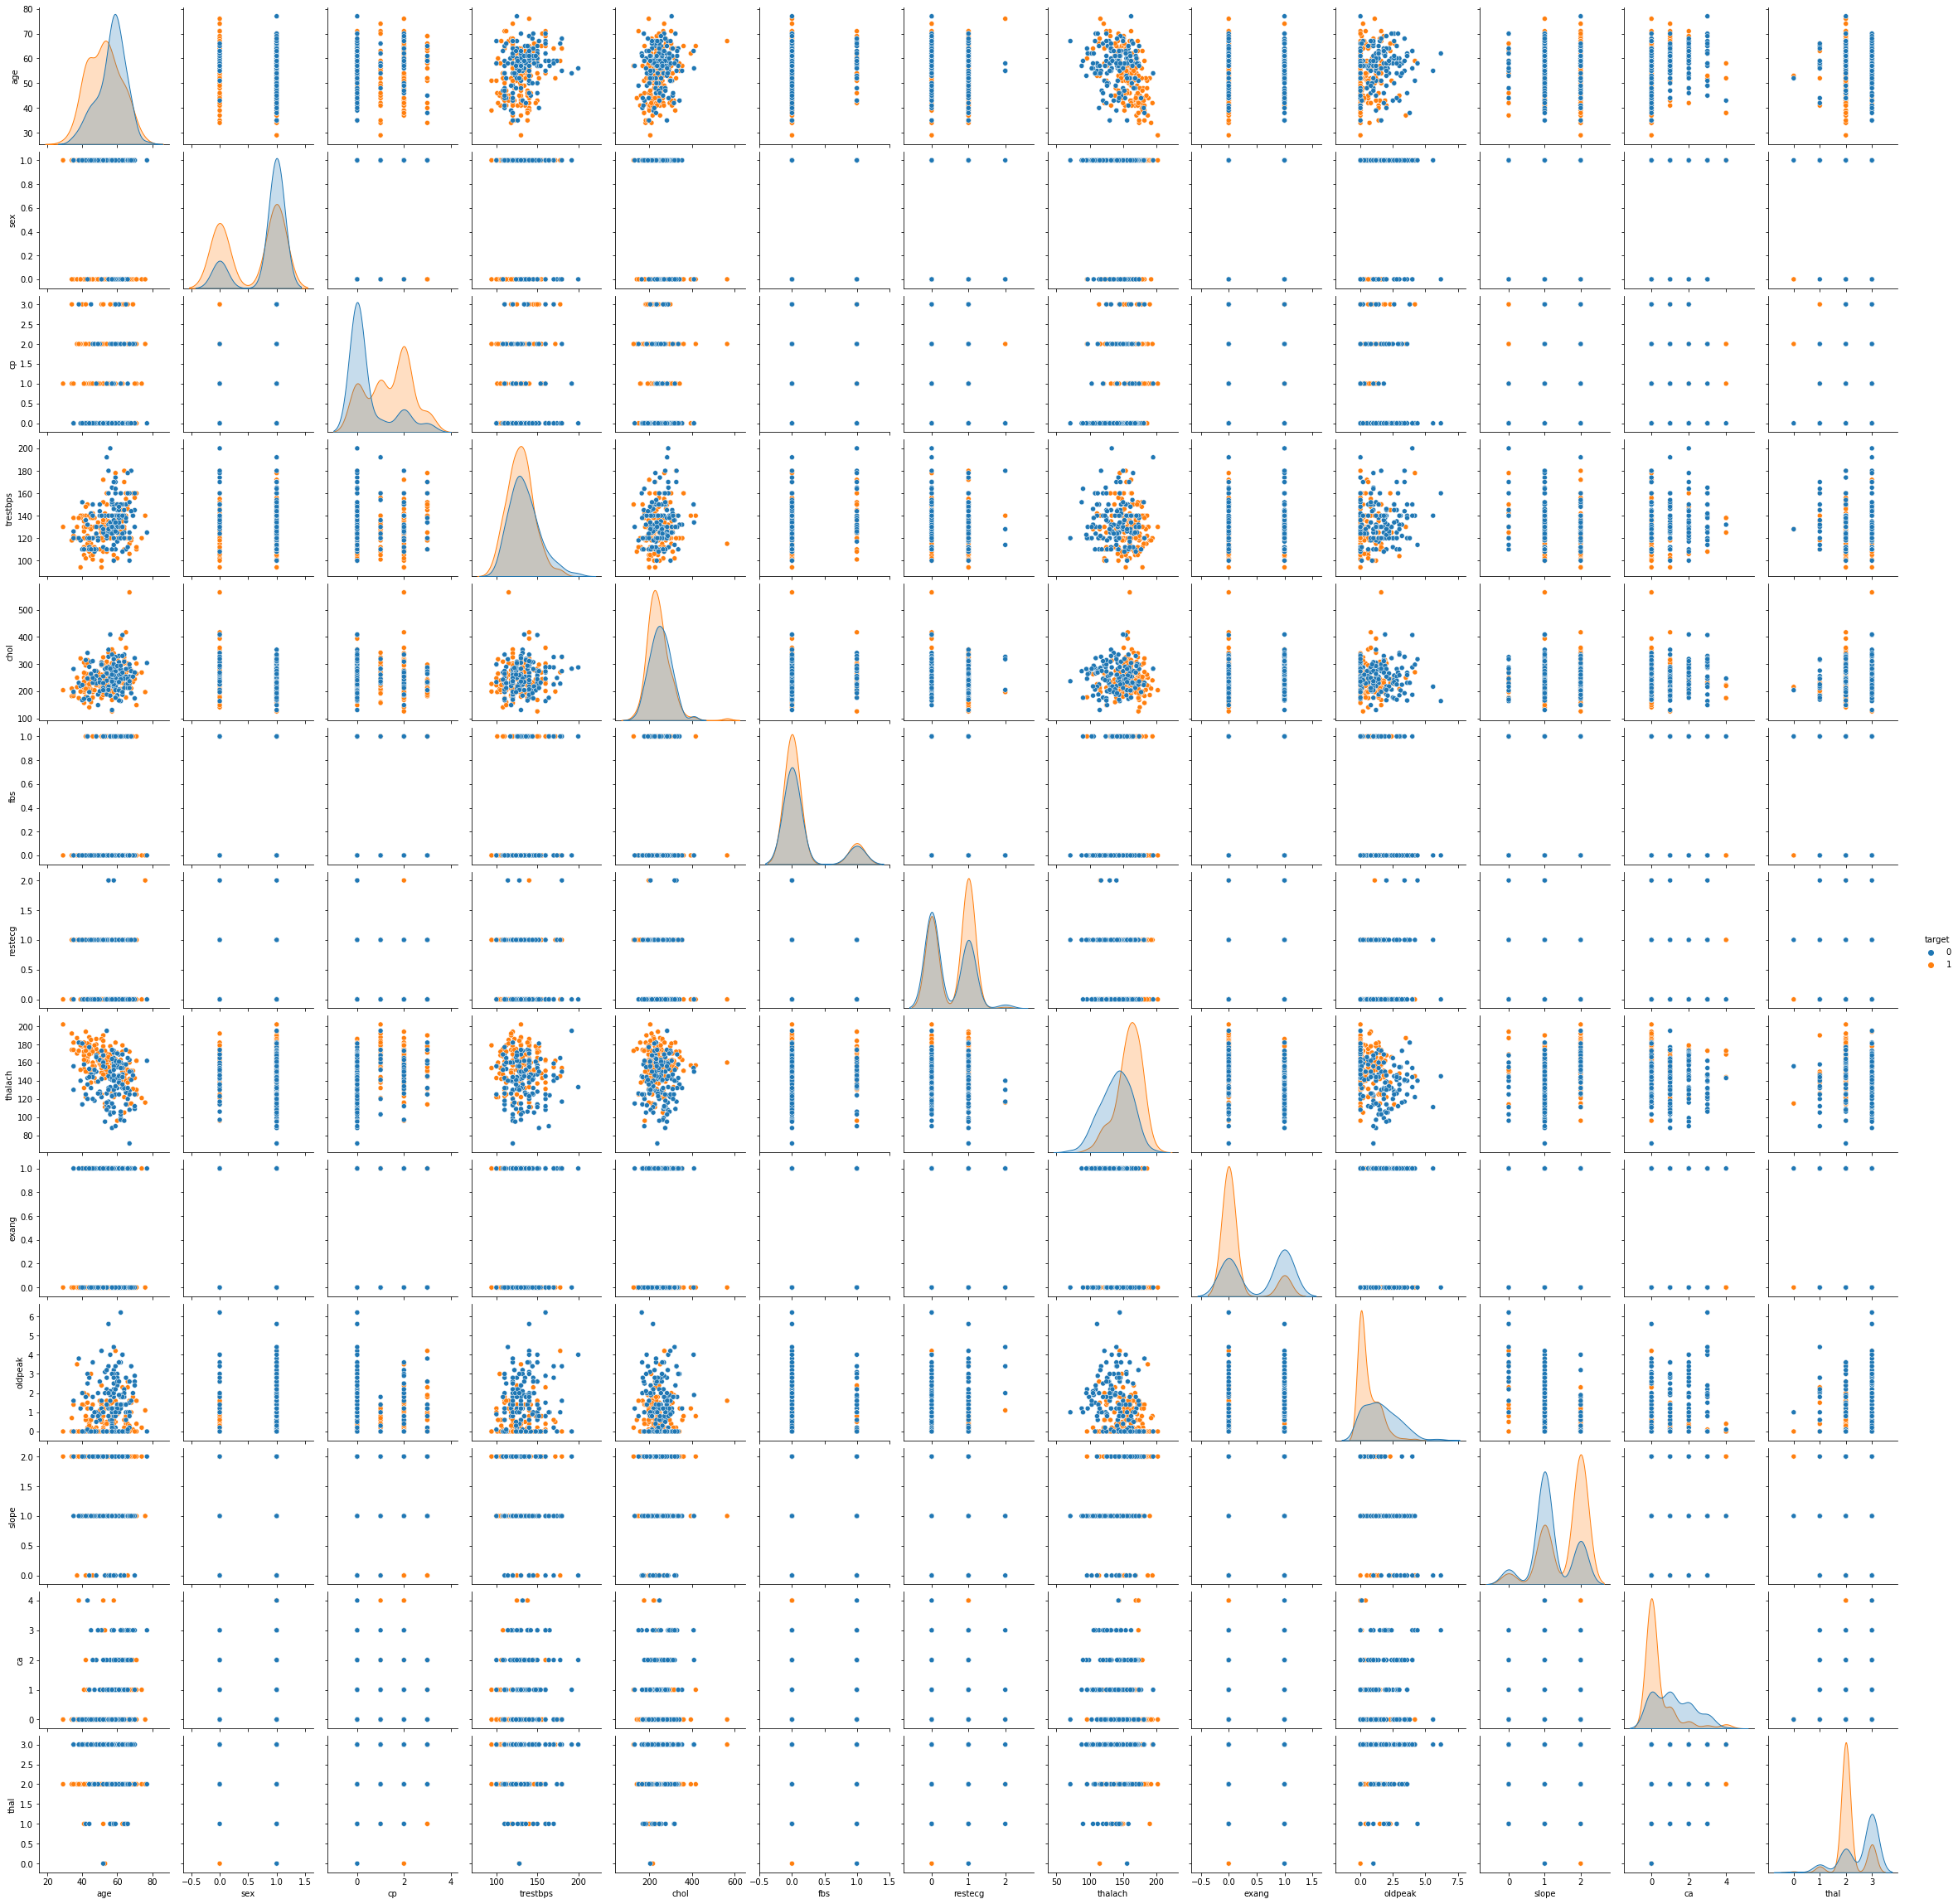

In [170]:
sns.pairplot(df,hue="target")